# The data is taken from the site https://data.police.uk/. The data was not cleaned. So, Data cleaning has been performed. And all the Cleaned Data is saved in Cleaned_Dataset 

## Crime Rate Analysis:

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import math
import geopandas as gpd
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error



def count_rows_in_csv(file):
    df = pd.read_csv(file)
    month = df['Month'][0]  # Assuming the month is the same for all rows in the CSV
    row_count = len(df)
    return month, row_count

def main():
    # Path to directory containing CSV files
    directory = 'Cleaned_Dataset'

    # Get list of CSV files in the directory
    csv_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.csv')]

    # Initialize an empty list to store results
    results = []

    # Calculate number of rows for each CSV file
    for file in csv_files:
        month, row_count = count_rows_in_csv(file)
        results.append({'Month': month, 'Number of Rows': row_count})

    # Convert results to DataFrame
    result_df = pd.DataFrame(results)

    # Save count to a new CSV file
    output_file = 'number_of_cases_over_time_LONDON.csv'
    result_df.to_csv(output_file, index=False)

    print(f'Row counts saved to {output_file}')

if __name__ == "__main__":
    main()


Row counts saved to number_of_cases_over_time_LONDON.csv


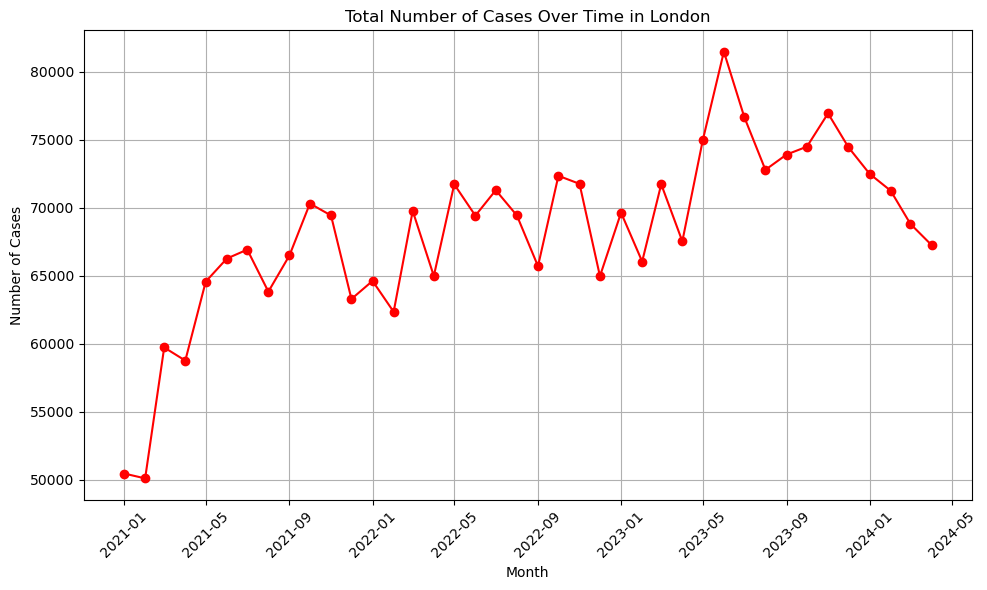

In [2]:
# Read the CSV file
df = pd.read_csv('number_of_cases_over_time_LONDON.csv')

# Convert 'Month' column to datetime type for proper sorting
df['Month'] = pd.to_datetime(df['Month'])

# Sort DataFrame by 'Month'
df.sort_values(by='Month', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Number of Rows'], marker='o', linestyle='-', color='red')
plt.title('Total Number of Cases Over Time in London')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [3]:
# Directory path 
directory_path = 'Cleaned_Dataset'

# Initialize an empty DataFrame to store filtered rows
haringey_crimes = pd.DataFrame()

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)
        # Read the CSV file
        df = pd.read_csv(file_path)
        # Filter rows where 'LSOA name' contains 'Haringey'
        haringey_df = df[df['LSOA name'].str.contains('Haringey')]
        # Concatenate the filtered DataFrame with the existing DataFrame
        haringey_crimes = pd.concat([haringey_crimes, haringey_df])

# Writing the combined DataFrame to a new CSV file
haringey_crimes.to_csv('Haringey/haringey_crimes_combined.csv', index=False)


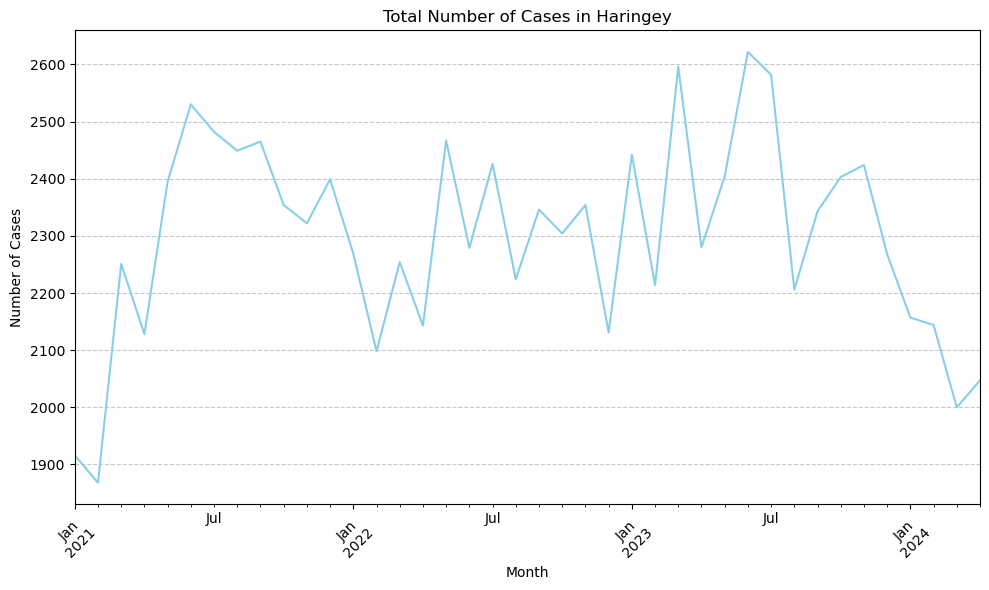

In [4]:
# Read the CSV file
data = pd.read_csv("Haringey/haringey_crimes_combined.csv")


# Convert 'Month' column to datetime type
data['Month'] = pd.to_datetime(data['Month'])


# Group data by month and count the number of cases in each month
monthly_cases = data.groupby(data['Month'].dt.to_period('M')).size()

# Plotting the graph
plt.figure(figsize=(10, 6))
monthly_cases.plot(kind='line', color='skyblue')
plt.title('Total Number of Cases in Haringey')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Decomposition of the Time Series:


/var/folders/2c/j8slzt2n29d8p3_2l4zj78fc0000gn/T/ipykernel_17156/3233413456.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


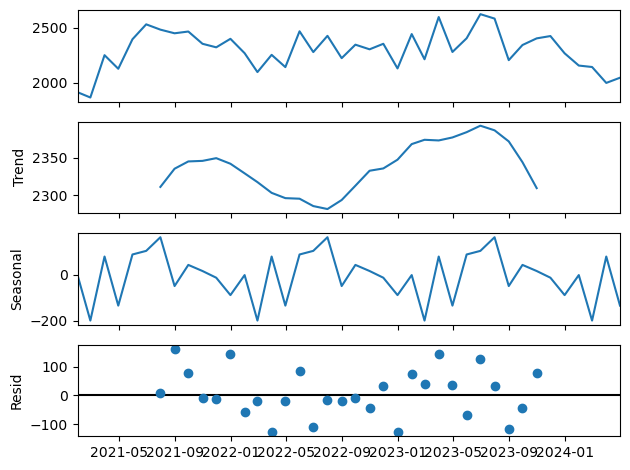


Stationarity Check:
ADF Statistic: -3.2496945140926727
p-value: 0.017282443180891994
Critical Values: {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}

Calculating Moving Average:


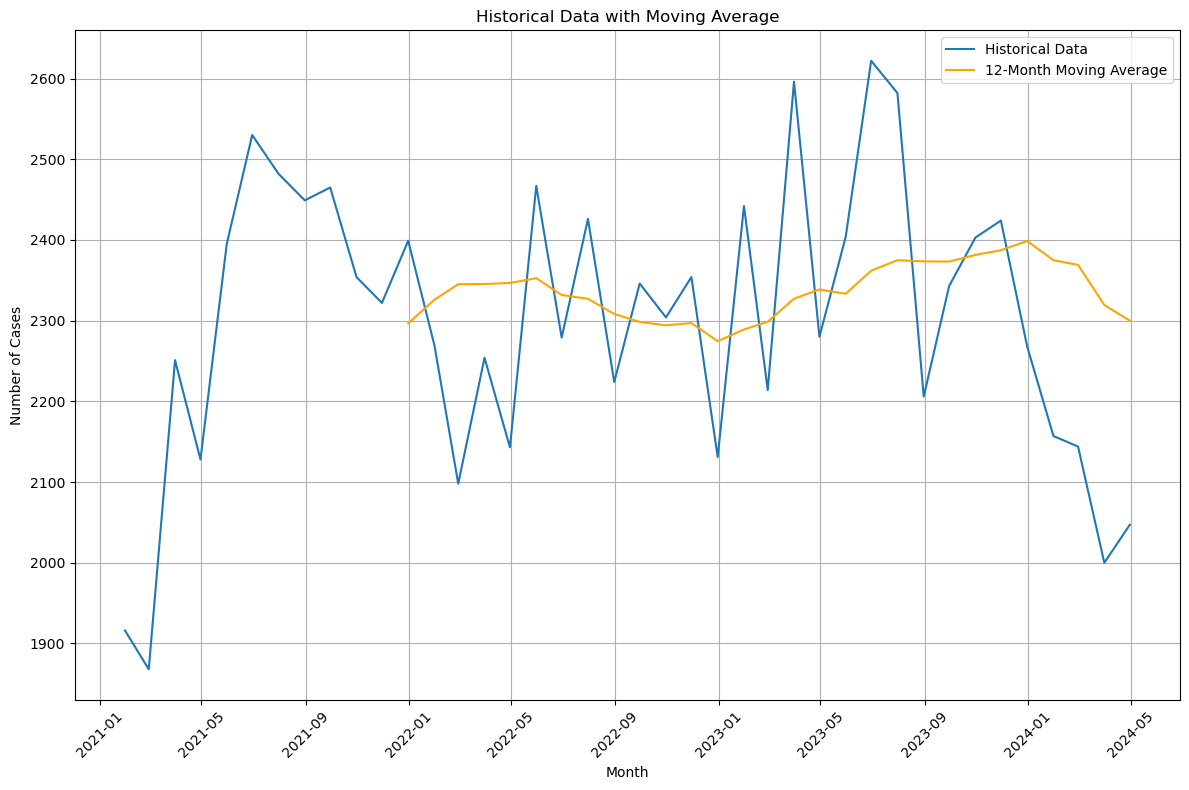


Fitting ARIMA Model:
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=529.228, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=530.598, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=527.016, Time=0.66 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=529.459, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=734.986, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=525.375, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=526.534, Time=0.04 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=528.496, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=525.509, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=525.593, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=528.328, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=523.197, Time=0.05 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=526.570, Time=0.19 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=525.197, Time=0.14 sec
 ARIMA(2,0,

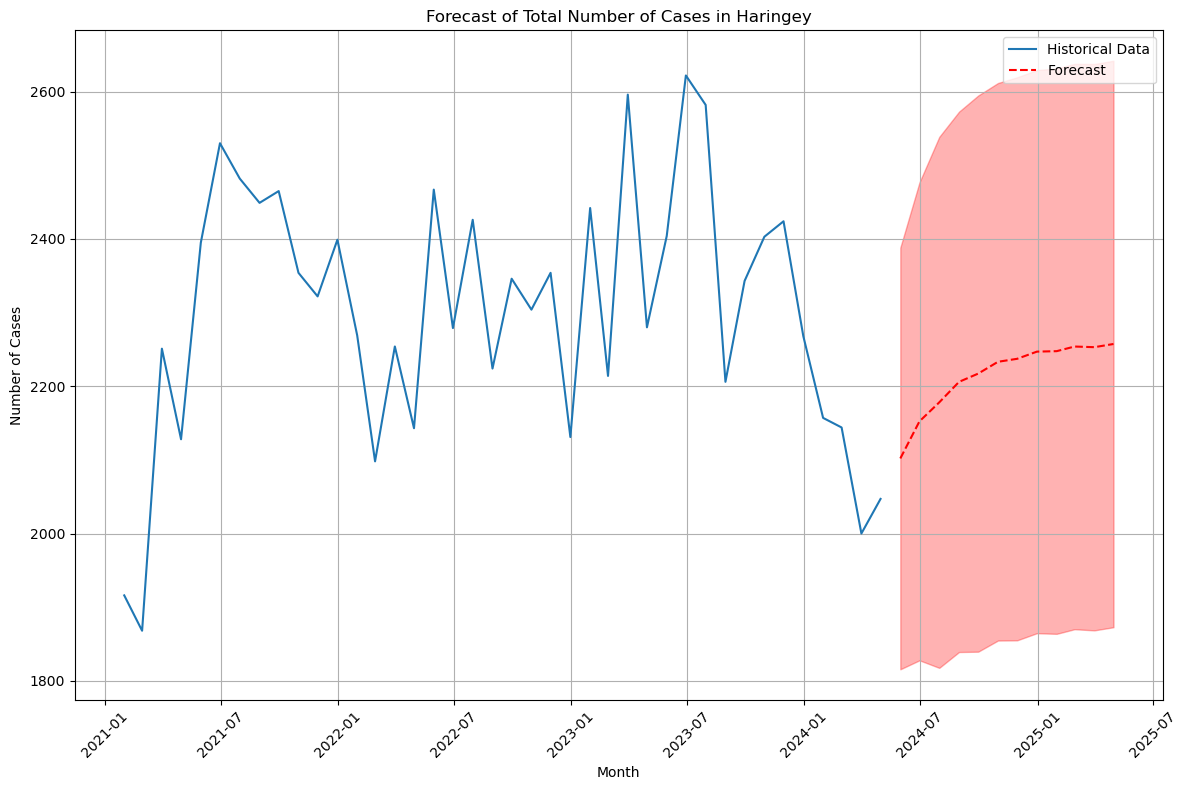

In [5]:
# Read the CSV file
data = pd.read_csv("Haringey/haringey_crimes_combined.csv")

# Convert 'Month' column to datetime type
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Group data by month and count the number of cases in each month
monthly_cases = data.resample('M').size()

# 1. Decomposition
print("Decomposition of the Time Series:")
decomposition = seasonal_decompose(monthly_cases, model='additive')
fig = decomposition.plot()
plt.tight_layout()
plt.show()

# 2. Stationarity Check
print("\nStationarity Check:")
result = adfuller(monthly_cases.dropna())  # dropna() to handle any missing values
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# 3. Moving Average Calculation
print("\nCalculating Moving Average:")
window_size = 12  # You can adjust the window size as needed
moving_average = monthly_cases.rolling(window=window_size).mean()

# Plotting the Moving Average
plt.figure(figsize=(12, 8))
plt.plot(monthly_cases, label='Historical Data')
plt.plot(moving_average, label=f'{window_size}-Month Moving Average', color='orange')
plt.title('Historical Data with Moving Average')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. ARIMA Modeling
print("\nFitting ARIMA Model:")
model = pm.auto_arima(monthly_cases, seasonal=True, m=12, trace=True,
                      error_action='ignore', suppress_warnings=True)
print(model.summary())

# 5. Forecasting
print("\nForecasting:")
n_periods = 12  # Number of periods to forecast
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Create a date range for future periods
forecast_index = pd.date_range(start=monthly_cases.index[-1] + pd.DateOffset(months=1),
                               periods=n_periods, freq='M')

# Convert forecast to a pandas Series
forecast_series = pd.Series(forecast, index=forecast_index)

# Plotting the Forecasting Results
plt.figure(figsize=(12, 8))
plt.plot(monthly_cases, label='Historical Data')
plt.plot(forecast_series, color='red', linestyle='--', label='Forecast')
plt.fill_between(forecast_series.index, conf_int[:, 0], conf_int[:, 1], color='red', alpha=0.3)
plt.title('Forecast of Total Number of Cases in Haringey')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


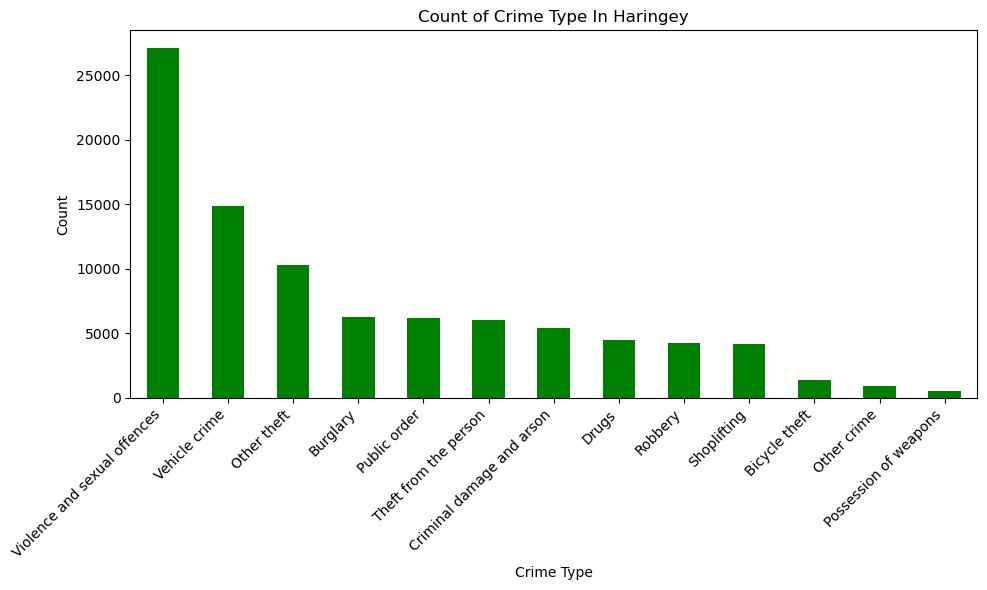

In [6]:
# Read the CSV file
crime_data = pd.read_csv("Haringey/haringey_crimes_combined.csv")

# Count the occurrences of each crime type
crime_counts = crime_data['Crime type'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar', color='green')
plt.title('Count of Crime Type In Haringey')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Temporal Dynamics of Crime in Haringey: Persistent vs. Transient Hotspots

In [7]:
# Read the CSV file
crime_data = pd.read_csv("Haringey/haringey_crimes_combined.csv")

# Ensuring the 'Month' column is in datetime format
crime_data['Month'] = pd.to_datetime(crime_data['Month'])

# Group by Month and Location, then count the occurrences
crime_counts = crime_data.groupby([crime_data['Month'].dt.to_period('M'), 'Location']).size().reset_index(name='Crime Count')

# Assigning score based on the condition
crime_counts['Score'] = crime_counts['Crime Count'].apply(lambda x: 1 if x > 1 else 0)

# Save the grouped data to a new CSV file
output_file_path = 'Haringey/location_wise_count_with_scores.csv' #  Monthly basis score
crime_counts.to_csv(output_file_path, index=False)

print(f"Grouped data with scores saved to {output_file_path}")

Grouped data with scores saved to Haringey/location_wise_count_with_scores.csv


In [8]:
# Path to the CSV file containing the crime data
file_path = 'Haringey/location_wise_count_with_scores.csv'

# Read the CSV file
crime_count = pd.read_csv(file_path)

# Checking the first few rows of the DataFrame to verify the data
print(crime_count.head())

# Checking the column names to ensure 'Score' and 'Location' are present
print(crime_count.columns)

# Ensuring the columns 'Location' and 'Score' are in the DataFrame
if 'Location' in crime_count.columns and 'Score' in crime_count.columns:
    # Aggregate the scores by location
    aggregated_scores = crime_count.groupby('Location')['Score'].sum().reset_index()

    # Saving the summed scores to a new CSV file
    output_file_path = 'Haringey/location_wise_sum_score.csv'
    aggregated_scores.to_csv(output_file_path, index=False)

    print(f"Summation of scores saved to {output_file_path}")
else:
    print("Error: 'Location' or 'Score' column not found in the data.")


     Month                      Location  Crime Count  Score
0  2021-01  On or near Abbotsford Avenue            1      0
1  2021-01       On or near Academia Way            1      0
2  2021-01         On or near Adams Mews            1      0
3  2021-01         On or near Adams Road            7      1
4  2021-01       On or near Albany Close            2      1
Index(['Month', 'Location', 'Crime Count', 'Score'], dtype='object')
Summation of scores saved to Haringey/location_wise_sum_score.csv


In [9]:
# Ensuring the columns 'Location' and 'Score' are in the DataFrame
if 'Location' in crime_counts.columns and 'Score' in crime_counts.columns:
    # Aggregating the scores by location
    aggregated_scores = crime_counts.groupby('Location')['Score'].sum().reset_index()

    # Saving the summed scores to a new CSV file
    output_file_path_summed = 'Haringey/location_wise_sum_score.csv'
    aggregated_scores.to_csv(output_file_path_summed, index=False)

    print(f"Summation of scores saved to {output_file_path_summed}")
    crime_data_score_sum = pd.read_csv(output_file_path_summed)
    # Calculate the mean of the 'Score' column
    mean_score = crime_data_score_sum['Score'].mean()
    print(mean_score)

    # Rounding up the mean to the nearest integer
    threshold = math.ceil(mean_score)
    
    print(threshold)

    # Classify each location as 'persistent' or 'transient'
    aggregated_scores['Classification'] = aggregated_scores['Score'].apply(
        lambda x: 'persistent' if x > threshold else 'transient'
    )

    # Saving the results to a new CSV file
    output_file_path_classified = 'Haringey/location_wise_sum_score_classification.csv'
    aggregated_scores.to_csv(output_file_path_classified, index=False)

    print(f"Summation and classification of scores saved to {output_file_path_classified}")




Summation of scores saved to Haringey/location_wise_sum_score.csv
14.031635802469136
15
Summation and classification of scores saved to Haringey/location_wise_sum_score_classification.csv


In [10]:
# Read the CSV file
df1 = pd.read_csv('Haringey/haringey_crimes_combined.csv')

# Read the CSV file
df2 = pd.read_csv('Haringey/location_wise_sum_score_classification.csv')

df1_unique = df1.drop_duplicates(subset=['Location'])

merged_df = pd.merge(df2, df1_unique[['Location', 'LSOA code']], on='Location', how='left')


# Saving the merged DataFrame to a new CSV file
merged_df.to_csv('Haringey/location_wise_sum_score_classification_updated.csv', index=False)


print("Merged file saved as 'Haringey/location_wise_sum_score_classification_updated.csv'.")



Merged file saved as 'Haringey/location_wise_sum_score_classification_updated.csv'.


In [11]:
# Path to the CSV file
input_file_path = 'Haringey/location_wise_sum_score_classification_updated.csv'

# Read the input CSV file
aggregated_scores = pd.read_csv(input_file_path)

# Split the data into 'transient' and 'persistent'
transient_data = aggregated_scores[aggregated_scores['Classification'] == 'transient']
persistent_data = aggregated_scores[aggregated_scores['Classification'] == 'persistent']

# Saving the 'transient' data to a new CSV file
transient_output_file_path = 'Haringey/transient_data.csv'
transient_data.to_csv(transient_output_file_path, index=False)

# Saving the 'persistent' data to a new CSV file
persistent_output_file_path = 'Haringey/persistent_data.csv'
persistent_data.to_csv(persistent_output_file_path, index=False)

print(f"Transient data saved to {transient_output_file_path}")
print(f"Persistent data saved to {persistent_output_file_path}")

Transient data saved to Haringey/transient_data.csv
Persistent data saved to Haringey/persistent_data.csv


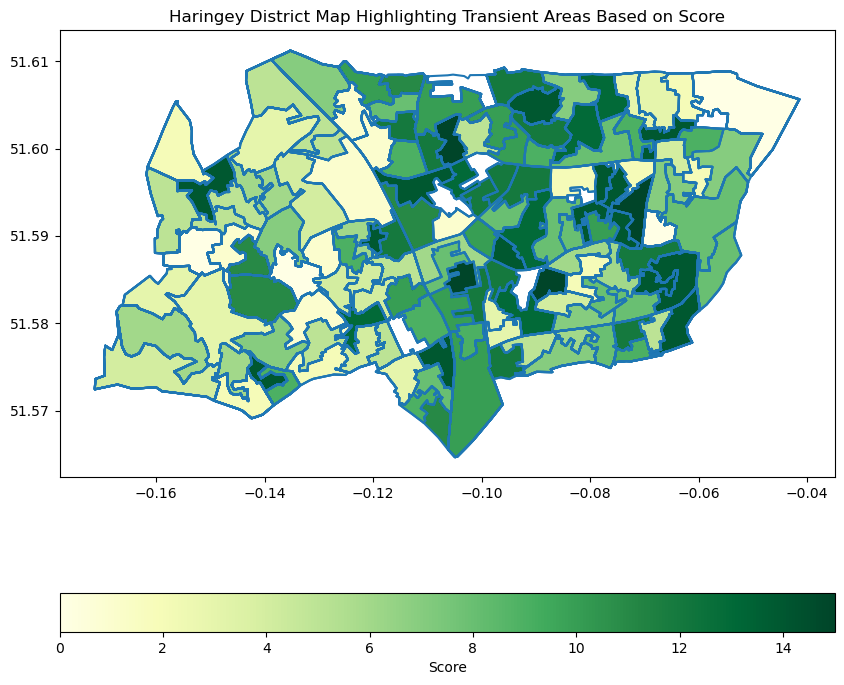

In [12]:
# Read the CSV file
csv_file = 'Haringey/transient_data.csv'
df = pd.read_csv(csv_file)

# Read the GeoJSON file
geojson_file = 'GeoJSON/map.geojson'
gdf = gpd.read_file(geojson_file)

# Merge the GeoDataFrame with the CSV data
gdf = gdf.merge(df, left_on='LSOA11CD', right_on='LSOA code', how='left')

# Plot the map with the 'Greens' colormap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.boundary.plot(ax=ax)
gdf.plot(column='Score', ax=ax, legend=True, 
         cmap='YlGn',  # Set to 'Greens' colormap
         legend_kwds={'label': "Score",
                      'orientation': "horizontal"})
plt.title('Haringey District Map Highlighting Transient Areas Based on Score')
plt.show()

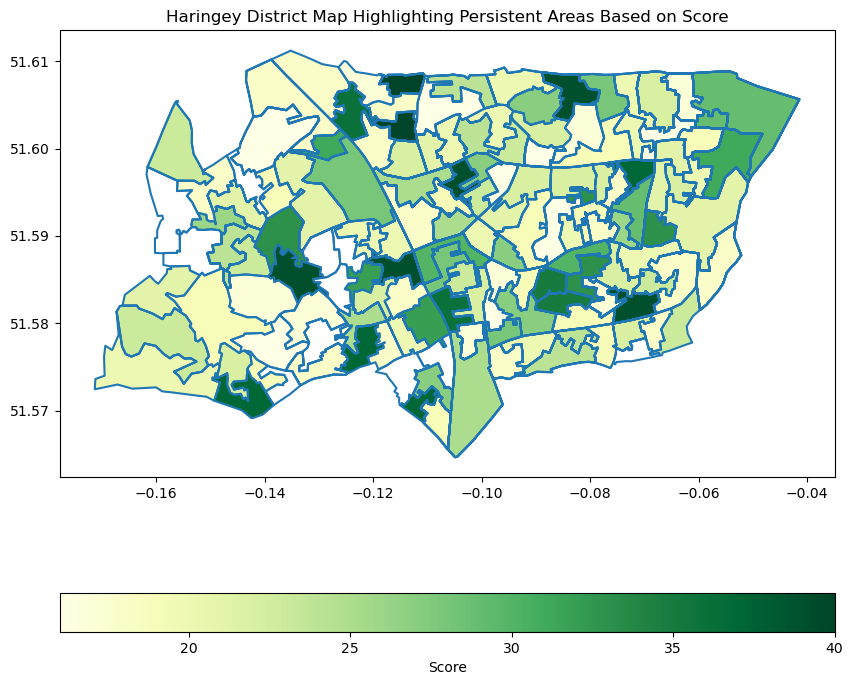

In [13]:
# Read the CSV file
csv_file = 'Haringey/persistent_data.csv'
df = pd.read_csv(csv_file)

# Read the GeoJSON file
geojson_file = 'GeoJSON/map.geojson'
gdf = gpd.read_file(geojson_file)

# Merge the GeoDataFrame with the CSV data
gdf = gdf.merge(df, left_on='LSOA11CD', right_on='LSOA code', how='left')

# Plot the map with the 'Greens' colormap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.boundary.plot(ax=ax)
gdf.plot(column='Score', ax=ax, legend=True, 
         cmap='YlGn',  # Set to 'Greens' colormap
         legend_kwds={'label': "Score",
                      'orientation': "horizontal"})
plt.title('Haringey District Map Highlighting Persistent Areas Based on Score')
plt.show()

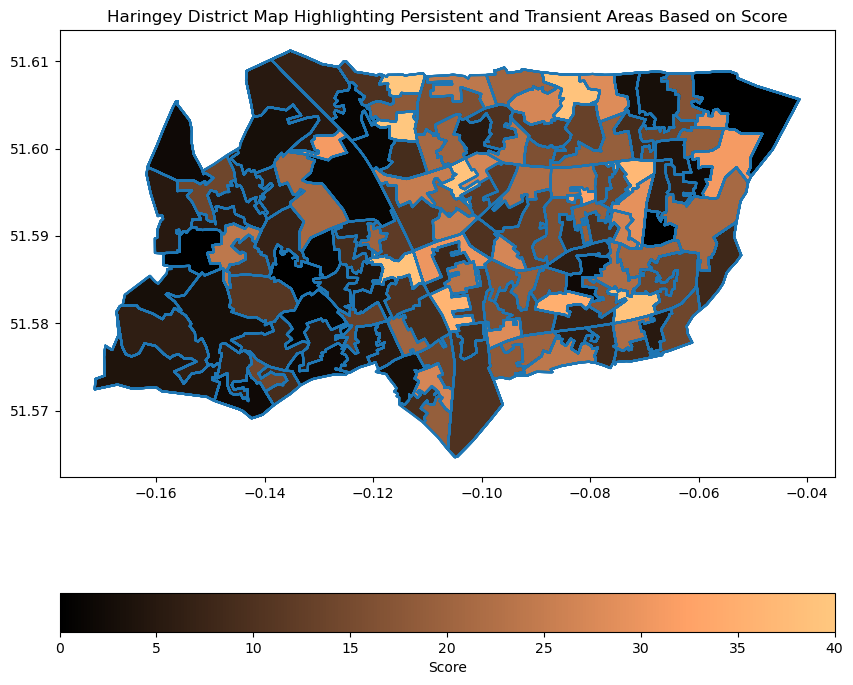

In [14]:
# Read the CSV file
csv_file = 'Haringey/location_wise_sum_score_classification_updated.csv'
df = pd.read_csv(csv_file)

# Read the GeoJSON file
geojson_file = 'GeoJSON/map.geojson'
gdf = gpd.read_file(geojson_file)

# Merge the GeoDataFrame with the CSV data
gdf = gdf.merge(df, left_on='LSOA11CD', right_on='LSOA code', how='left')

# Plot the map with the 'brown' colormap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.boundary.plot(ax=ax)
gdf.plot(column='Score', ax=ax, legend=True, 
         cmap='copper',  # Set to 'brown' colormap
         legend_kwds={'label': "Score",
                      'orientation': "horizontal"})
plt.title('Haringey District Map Highlighting Persistent and Transient Areas Based on Score')
plt.show()

In [15]:
# Directory path
directory_path = 'Cleaned_Dataset'

# List of boroughs 
boroughs = [
    "City of London", "Westminster", "Kensington and Chelsea", "Hammersmith and Fulham",
    "Wandsworth", "Lambeth", "Southwark", "Tower Hamlets", "Hackney", "Islington",
    "Camden", "Brent", "Ealing", "Hounslow", "Richmond upon Thames", "Kingston upon Thames",
    "Merton", "Sutton", "Croydon", "Bromley", "Lewisham", "Greenwich", "Bexley", "Havering",
    "Barking and Dagenham", "Redbridge", "Newham", "Waltham Forest", "Haringey", "Enfield",
    "Barnet", "Harrow", "Hillingdon"
]

# Iterating over each borough and creating a CSV file for each
for borough in boroughs:
    # Initialize an empty DataFrame to store filtered rows for the current borough
    borough_crimes = pd.DataFrame()

    # Iterate over each file in the directory
    for filename in os.listdir(directory_path):
        # Checking if the file is a CSV file
        if filename.endswith('.csv'):
            # Constructing the full file path
            file_path = os.path.join(directory_path, filename)
            # Read the CSV file
            df = pd.read_csv(file_path)
            # Filter rows where 'LSOA name' contains the borough name
            borough_df = df[df['LSOA name'].str.contains(borough, case=False, na=False)]
            # Concatenate the filtered DataFrame with the existing DataFrame
            borough_crimes = pd.concat([borough_crimes, borough_df])

    # Writing the combined DataFrame to a new CSV file if it's not empty
    if not borough_crimes.empty:
        output_file_path = f'All_boroughs/{borough}.csv'
        borough_crimes.to_csv(output_file_path, index=False)
        print(f"{borough} data saved to {output_file_path}")

City of London data saved to All_boroughs/City of London.csv
Westminster data saved to All_boroughs/Westminster.csv
Kensington and Chelsea data saved to All_boroughs/Kensington and Chelsea.csv
Hammersmith and Fulham data saved to All_boroughs/Hammersmith and Fulham.csv
Wandsworth data saved to All_boroughs/Wandsworth.csv
Lambeth data saved to All_boroughs/Lambeth.csv
Southwark data saved to All_boroughs/Southwark.csv
Tower Hamlets data saved to All_boroughs/Tower Hamlets.csv
Hackney data saved to All_boroughs/Hackney.csv
Islington data saved to All_boroughs/Islington.csv
Camden data saved to All_boroughs/Camden.csv
Brent data saved to All_boroughs/Brent.csv
Ealing data saved to All_boroughs/Ealing.csv
Hounslow data saved to All_boroughs/Hounslow.csv
Richmond upon Thames data saved to All_boroughs/Richmond upon Thames.csv
Kingston upon Thames data saved to All_boroughs/Kingston upon Thames.csv
Merton data saved to All_boroughs/Merton.csv
Sutton data saved to All_boroughs/Sutton.csv
Croy

## Persistent Crime Hotspots and Their Associated Crime Types in Haringey

In [16]:
file_path = 'Haringey/persistent_data.csv'

# Reading the CSV file
df = pd.read_csv(file_path)

# Calculating the maximum score
max_score = df['Score'].max()

# Finding the location(s) with the maximum score
locations_of_interest = df[df['Score'] == max_score]['Location'].tolist()

print(f"The maximum score is: {max_score}")
print(f"Location(s) with the maximum score: {locations_of_interest}")
crime_df = pd.read_csv("Haringey/haringey_crimes_combined.csv")

# Filtering the data for the specified locations
filtered_crime_df = crime_df[crime_df['Location'].isin(locations_of_interest)]

# Extracting the 'Crime type' column for the filtered rows
crime_types_for_locations = filtered_crime_df[['Location', 'Crime type']]

# Saving the results to a new CSV file
output_path = 'Haringey/persistent_crime_type.csv'
crime_types_for_locations.to_csv(output_path, index=False)
print(f"Filtered crime data saved to {output_path}")

# Load data from CSV into DataFrame
df = pd.read_csv(output_path)

# Getting the most common crime type for each location
most_common_crime = df.groupby('Location')['Crime type'].agg(lambda x: x.value_counts().idxmax()).reset_index()


# Saving the results to a new CSV file
output_path = 'Haringey/persistent_crime_type_max.csv'
most_common_crime.to_csv(output_path, index=False)
print(f"Filtered crime data saved to {output_path}")


The maximum score is: 40
Location(s) with the maximum score: ['On or near Amber Mews', 'On or near Bennetts Close', 'On or near Buller Road', 'On or near Burdock Road', 'On or near High Road', 'On or near Lordship Lane', 'On or near Parking Area', 'On or near Petrol Station', 'On or near Portree Close', 'On or near Shopping Area', 'On or near Sports/Recreation Area', 'On or near Supermarket', 'On or near Turnant Road']
Filtered crime data saved to Haringey/persistent_crime_type.csv
Filtered crime data saved to Haringey/persistent_crime_type_max.csv


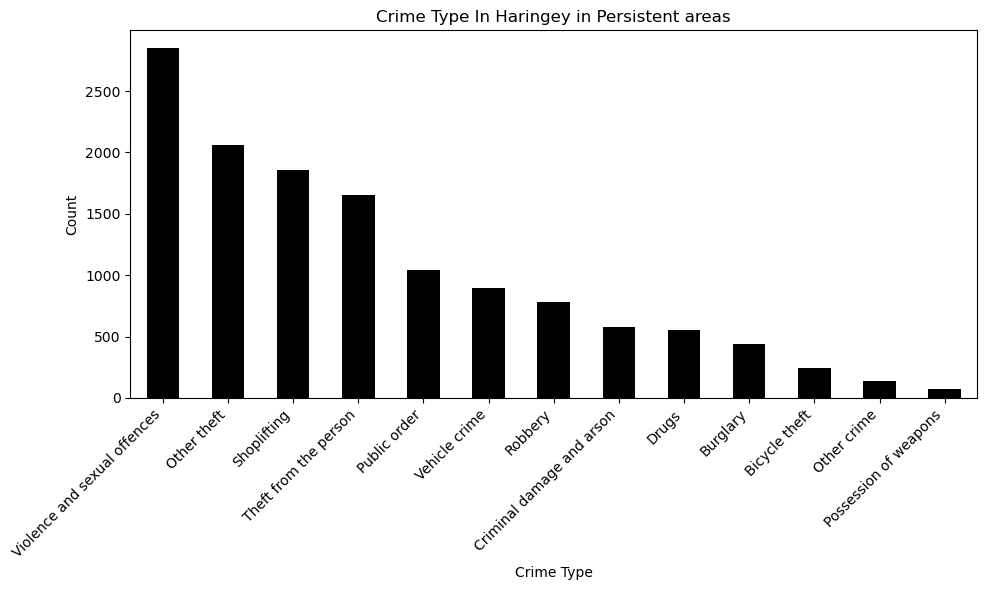

In [17]:
# Read the CSV file
crime_data = pd.read_csv("Haringey/persistent_crime_type.csv")

# Count the occurrences of each crime type
crime_counts = crime_data['Crime type'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
crime_counts.plot(kind='bar', color='black')
plt.title('Crime Type In Haringey in Persistent areas')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

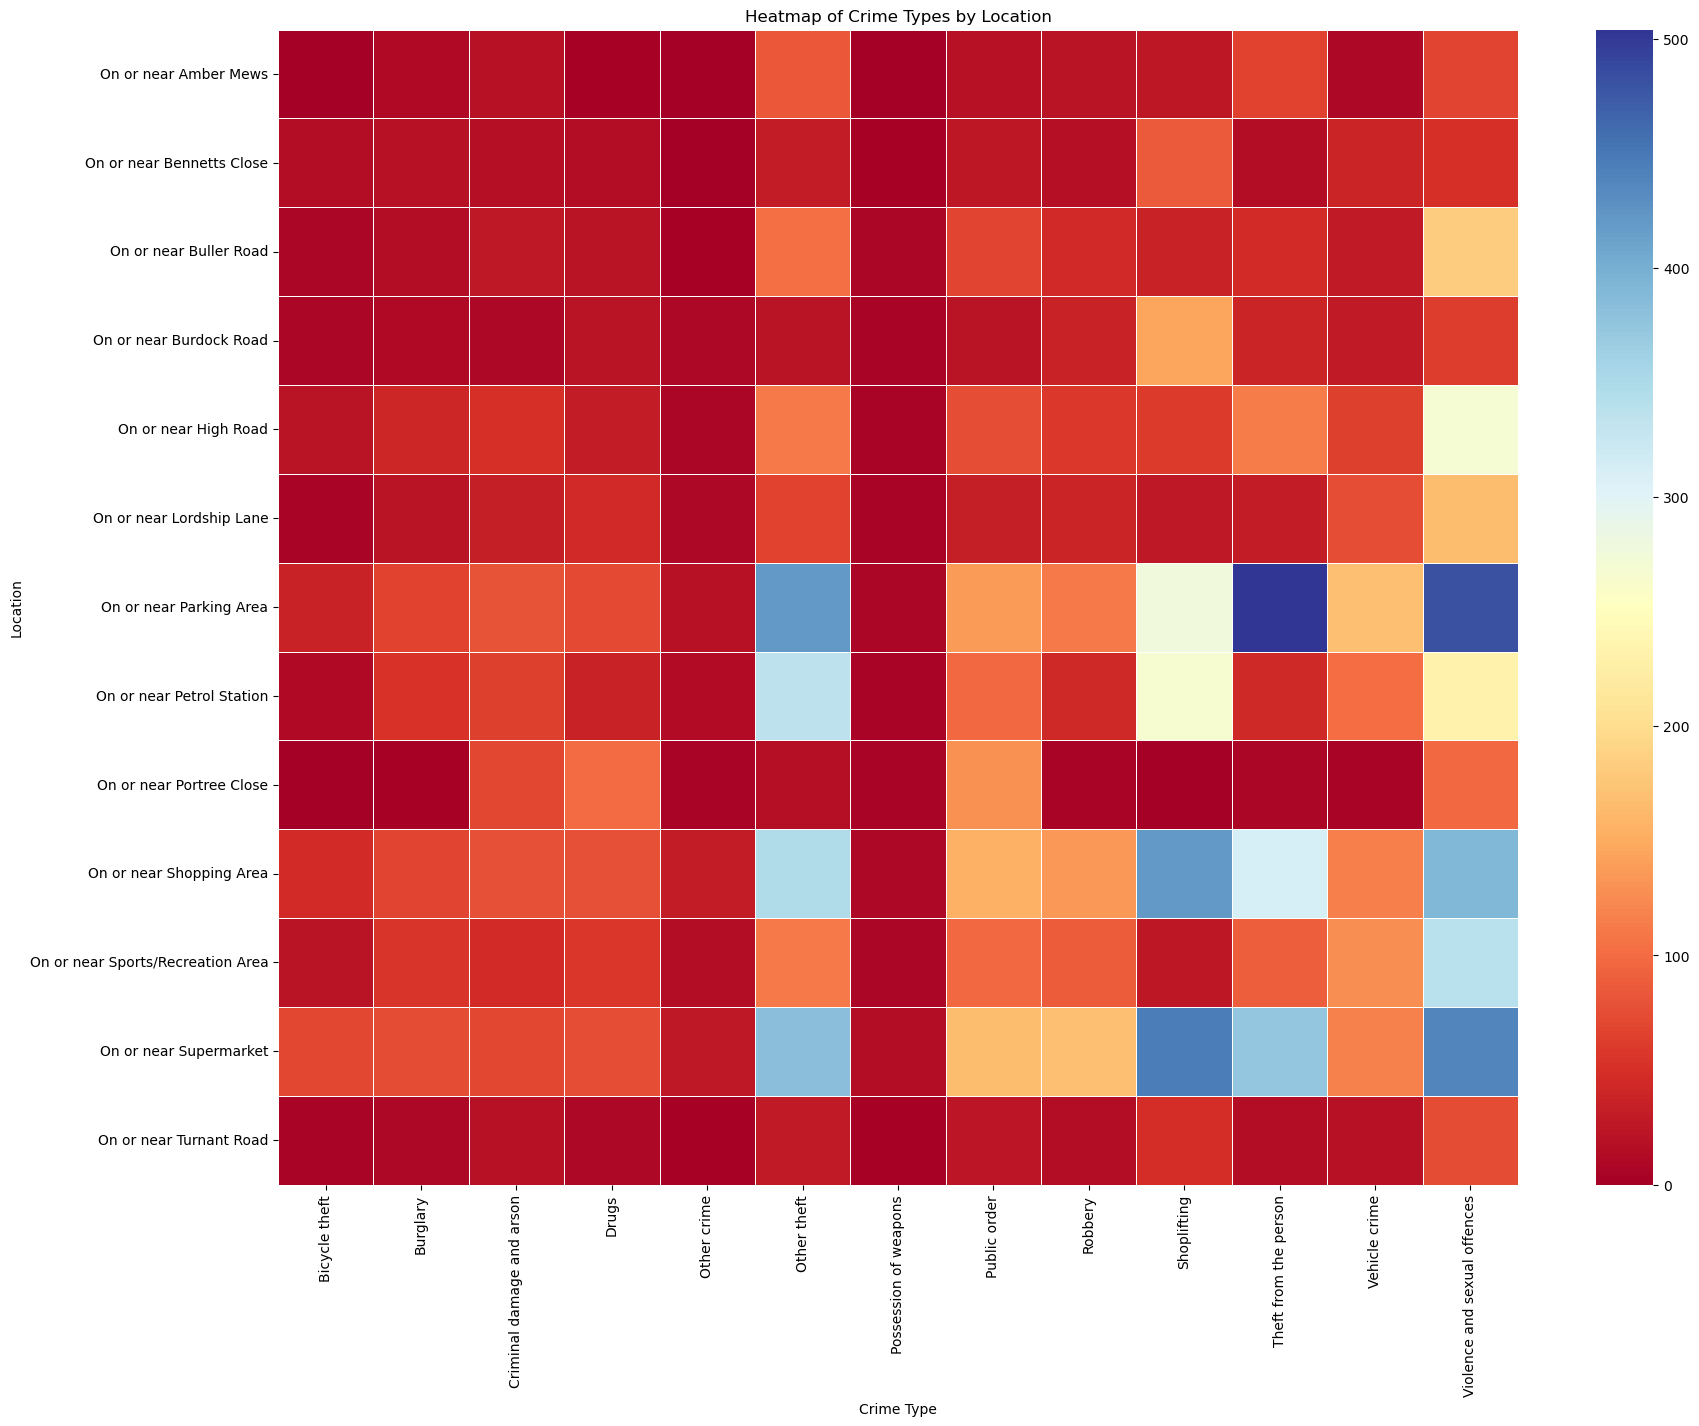

In [18]:
# Load the CSV file
file_path = 'Haringey/persistent_crime_type.csv'
data = pd.read_csv(file_path)

# Creating a pivot table to count occurrences of each crime type per location
pivot_table = data.pivot_table(index='Location', columns='Crime type', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(pivot_table, cmap='RdYlBu', linewidths=.5)
plt.title('Heatmap of Crime Types by Location')
plt.xlabel('Crime Type')
plt.ylabel('Location')
plt.show()

## Analysis of Crime Hotspots: Haringey vs. Other London Borough

Top 5 Boroughs with the Highest Crime Rates:
        Borough  Crime Count
9   Westminster       238053
24       Newham       113906
8        Camden       111484
15    Southwark       110222
23      Lambeth       108037


/var/folders/2c/j8slzt2n29d8p3_2l4zj78fc0000gn/T/ipykernel_17156/1472584724.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data['Borough'], rotation=45, ha='right')


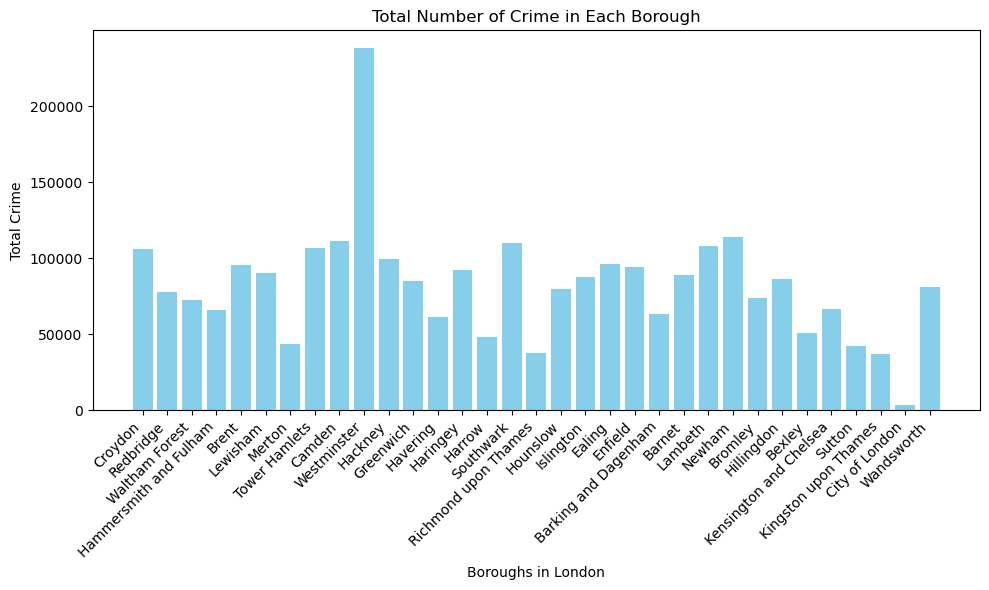

In [19]:
# Directory containing the CSV files
directory = 'All_boroughs'

# List to store file names and their respective row counts
file_names = []
row_counts = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Remove the '.csv' extension from the file name
        name_without_extension = os.path.splitext(filename)[0]
        # Append the file name (without extension) and row count to the lists
        file_names.append(name_without_extension)
        row_counts.append(len(df))

# Create a DataFrame from the file names and row counts
data = pd.DataFrame({'Borough': file_names, 'Crime Count': row_counts})

# Sort the DataFrame by the 'Crime Count' in descending order
sorted_data = data.sort_values(by='Crime Count', ascending=False)

# Get the top 5 boroughs with the highest crime rates
top_5_boroughs = sorted_data.head(5)

# Printing the top 5 boroughs
print("Top 5 Boroughs with the Highest Crime Rates:")
print(top_5_boroughs)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart
ax.bar(data['Borough'], data['Crime Count'], color='skyblue')

# Adding titles and labels
ax.set_title('Total Number of Crime in Each Borough')
ax.set_xlabel('Boroughs in London')
ax.set_ylabel('Total Crime')
ax.set_xticklabels(data['Borough'], rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [20]:
# Directory containing the CSV files
directory = 'All_boroughs'

# List to store borough names, highest crime type, and its count
boroughs = []
highest_crime_type = []
highest_crime_count = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Compute crime type counts
        crime_counts = df['Crime type'].value_counts()
        
        # Determine the crime type with the highest count
        highest_type = crime_counts.idxmax()
        highest_count = crime_counts.max()
        
        # Remove the '.csv' extension from the file name
        borough_name = os.path.splitext(filename)[0]
        
        # Append results to lists
        boroughs.append(borough_name)
        highest_crime_type.append(highest_type)
        highest_crime_count.append(highest_count)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Borough': boroughs,
    'Highest Crime Type': highest_crime_type,
    'Count': highest_crime_count
})

# Save the results to a CSV file
results_csv_path = 'highest_crime_types.csv'
results_df.to_csv(results_csv_path, index=False)



# Print confirmation message
print(f"Results saved to {results_csv_path}")

Results saved to highest_crime_types.csv


Grouped data with scores saved to Westminster/location_wise_count_with_scores_Westminster.csv
Summation of scores saved to Westminster/location_wise_sum_score_Westminster.csv
15.129012345679012
16
Summation and classification of scores saved to Westminster/location_wise_sum_score_classification_Westminster.csv
Persistent data saved to Westminster/persistent_Westminster.csv
The maximum score is: 40
Location(s) with the maximum score: ["On or near Bishop'S Bridge Road", 'On or near Bridge Street', 'On or near Charing Cross Road', "On or near Craig'S Court", 'On or near Downing Street', 'On or near Gerrard Place', 'On or near Inverness Mews', 'On or near Lupus Street', 'On or near Nightclub', 'On or near Palace Place', 'On or near Parking Area', 'On or near Queensway', 'On or near Shopping Area', 'On or near Soho Street', 'On or near Stourcliffe Street']
Filtered crime data saved to Westminster/persistent_crime_type.csv
Filtered crime data with most common crime types saved to Westminster

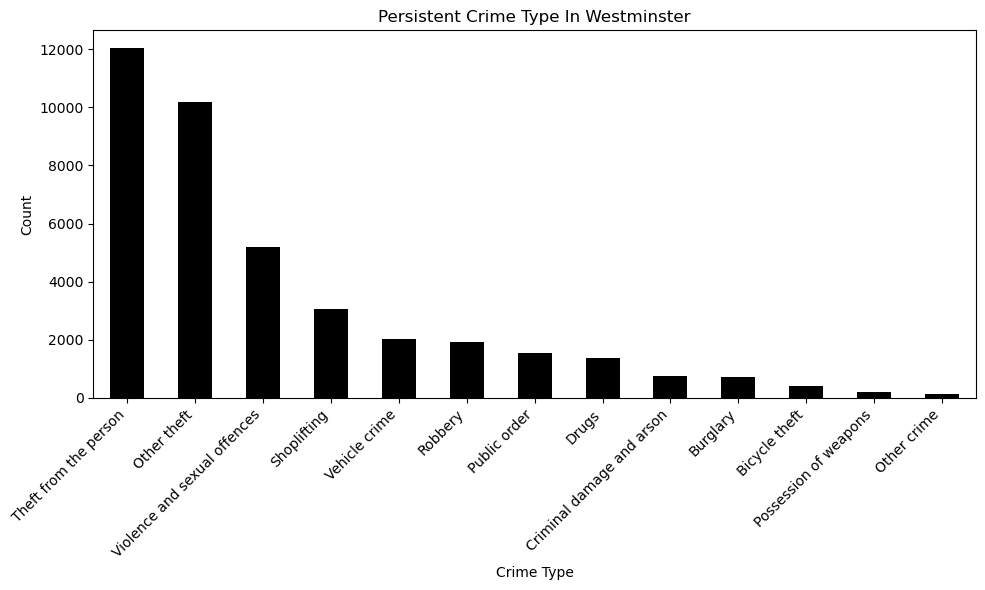

In [21]:
# Step 1: Read the CSV file and ensuring the 'Month' column is in datetime format
file_path = 'All_boroughs/Westminster.csv'
crime_data = pd.read_csv(file_path)
crime_data['Month'] = pd.to_datetime(crime_data['Month'])

# Step 2: Group by Month and Location, then count the occurrences
crime_counts = crime_data.groupby([crime_data['Month'].dt.to_period('M'), 'Location']).size().reset_index(name='Crime Count')

# Step 3: Assigning score based on the condition
crime_counts['Score'] = crime_counts['Crime Count'].apply(lambda x: 1 if x > 1 else 0)

# Step 4: Save the grouped data to a new CSV file
output_file_path_grouped = 'Westminster/location_wise_count_with_scores_Westminster.csv'
crime_counts.to_csv(output_file_path_grouped, index=False)
print(f"Grouped data with scores saved to {output_file_path_grouped}")

# Step 5: Aggregate the scores by location
if 'Location' in crime_counts.columns and 'Score' in crime_counts.columns:
    aggregated_scores = crime_counts.groupby('Location')['Score'].sum().reset_index()

    # Save the summed scores to a new CSV file
    output_file_path_summed = 'Westminster/location_wise_sum_score_Westminster.csv'
    aggregated_scores.to_csv(output_file_path_summed, index=False)
    print(f"Summation of scores saved to {output_file_path_summed}")

    # Calculate the mean of the 'Score' column
    mean_score = aggregated_scores['Score'].mean()
    print(mean_score)

    # Round up the mean to the nearest integer
    threshold = math.ceil(mean_score)
    print(threshold)

    # Classify each location as 'persistent' or 'transient'
    aggregated_scores['Classification'] = aggregated_scores['Score'].apply(
        lambda x: 'persistent' if x > threshold else 'transient'
    )

    # Save the results to a new CSV file
    output_file_path_classified = 'Westminster/location_wise_sum_score_classification_Westminster.csv'
    aggregated_scores.to_csv(output_file_path_classified, index=False)
    print(f"Summation and classification of scores saved to {output_file_path_classified}")

    # Step 6: Filter 'persistent' data and save to a new CSV file
    persistent_data = aggregated_scores[aggregated_scores['Classification'] == 'persistent']
    persistent_output_file_path = 'Westminster/persistent_Westminster.csv'
    persistent_data.to_csv(persistent_output_file_path, index=False)
    print(f"Persistent data saved to {persistent_output_file_path}")

    # Step 7: Find the maximum score and the corresponding locations
    max_score = persistent_data['Score'].max()
    locations_of_interest = persistent_data[persistent_data['Score'] == max_score]['Location'].tolist()
    print(f"The maximum score is: {max_score}")
    print(f"Location(s) with the maximum score: {locations_of_interest}")

    # Step 8: Read another CSV file for crime types in those locations
    crime_df = pd.read_csv("All_boroughs/Westminster.csv")
    filtered_crime_df = crime_df[crime_df['Location'].isin(locations_of_interest)]
    crime_types_for_locations = filtered_crime_df[['Location', 'Crime type']]
    output_path = 'Westminster/persistent_crime_type.csv'
    crime_types_for_locations.to_csv(output_path, index=False)
    print(f"Filtered crime data saved to {output_path}")

    # Step 9: Get the most common crime type for each location
    df = pd.read_csv(output_path)
    most_common_crime = df.groupby('Location')['Crime type'].agg(lambda x: x.value_counts().idxmax()).reset_index()
    output_path_common_crime = 'Westminster/persistent_crime_type_max.csv'
    most_common_crime.to_csv(output_path_common_crime, index=False)
    print(f"Filtered crime data with most common crime types saved to {output_path_common_crime}")

    # Step 10: Visualize the most common persistent crime types
    crime_data_for_plot = pd.read_csv("Westminster/persistent_crime_type.csv")
    crime_counts_for_plot = crime_data_for_plot['Crime type'].value_counts()
    plt.figure(figsize=(10, 6))
    crime_counts_for_plot.plot(kind='bar', color='black')
    plt.title('Persistent Crime Type In Westminster')
    plt.xlabel('Crime Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Location' or 'Score' column not found in the data.")


Grouped data with scores saved to Newham/location_wise_count_with_scores_Newham.csv
Summation of scores saved to Newham/location_wise_sum_score_Newham.csv
11.948564593301436
12
Summation and classification of scores saved to Newham/location_wise_sum_score_classification_Newham.csv
Persistent data saved to Newham/persistent_Newham.csv
The maximum score is: 40
Location(s) with the maximum score: ['On or near Barking Road', 'On or near Further/Higher Educational Building', 'On or near Glen Road', 'On or near High Street', 'On or near High Street North', 'On or near Katherine Road', 'On or near Lloyd Road', 'On or near Masefield Gardens', 'On or near Myrtle Road', 'On or near Parking Area', 'On or near Petrol Station', 'On or near Police Station', 'On or near Service Route No 1', 'On or near Shopping Area', 'On or near Supermarket', 'On or near Western Gateway', 'On or near Woodgrange Road']
Filtered crime data saved to Newham/persistent_crime_type.csv
Filtered crime data with most common 

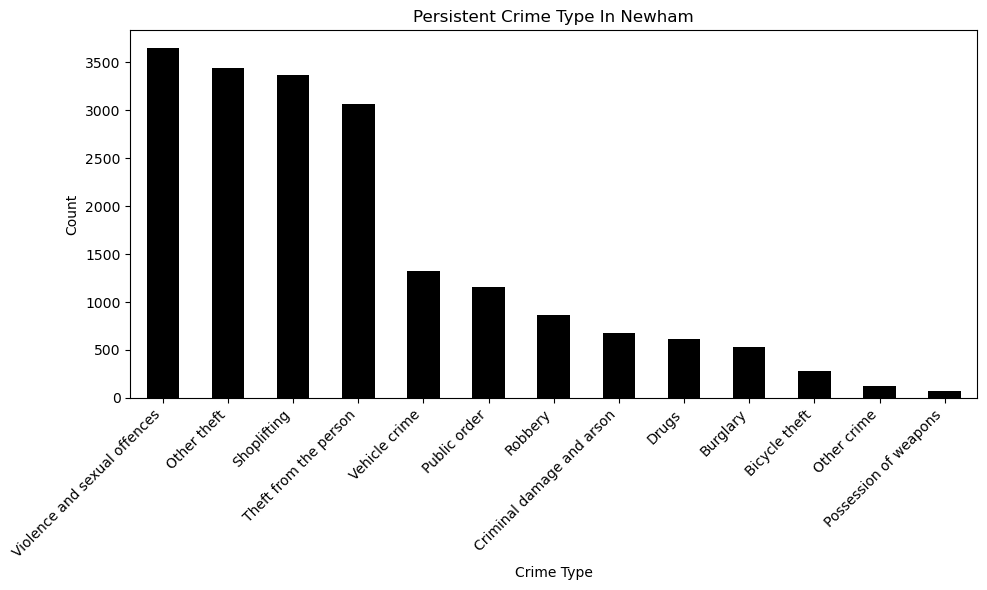

In [22]:
# Step 1: Read the CSV file and ensure the 'Month' column is in datetime format
file_path = 'All_boroughs/Newham.csv'
crime_data = pd.read_csv(file_path)
crime_data['Month'] = pd.to_datetime(crime_data['Month'])

# Step 2: Group by Month and Location, then count the occurrences
crime_counts = crime_data.groupby([crime_data['Month'].dt.to_period('M'), 'Location']).size().reset_index(name='Crime Count')

# Step 3: Assign score based on the condition
crime_counts['Score'] = crime_counts['Crime Count'].apply(lambda x: 1 if x > 1 else 0)

# Step 4: Save the grouped data to a new CSV file
output_file_path_grouped = 'Newham/location_wise_count_with_scores_Newham.csv'
crime_counts.to_csv(output_file_path_grouped, index=False)
print(f"Grouped data with scores saved to {output_file_path_grouped}")

# Step 5: Aggregate the scores by location
if 'Location' in crime_counts.columns and 'Score' in crime_counts.columns:
    aggregated_scores = crime_counts.groupby('Location')['Score'].sum().reset_index()

    # Save the summed scores to a new CSV file
    output_file_path_summed = 'Newham/location_wise_sum_score_Newham.csv'
    aggregated_scores.to_csv(output_file_path_summed, index=False)
    print(f"Summation of scores saved to {output_file_path_summed}")

    # Calculate the mean of the 'Score' column
    mean_score = aggregated_scores['Score'].mean()
    print(mean_score)

    # Round up the mean to the nearest integer
    threshold = math.ceil(mean_score)
    print(threshold)

    # Classify each location as 'persistent' or 'transient'
    aggregated_scores['Classification'] = aggregated_scores['Score'].apply(
        lambda x: 'persistent' if x > threshold else 'transient'
    )

    # Save the results to a new CSV file
    output_file_path_classified = 'Newham/location_wise_sum_score_classification_Newham.csv'
    aggregated_scores.to_csv(output_file_path_classified, index=False)
    print(f"Summation and classification of scores saved to {output_file_path_classified}")

    # Step 6: Filter 'persistent' data and save to a new CSV file
    persistent_data = aggregated_scores[aggregated_scores['Classification'] == 'persistent']
    persistent_output_file_path = 'Newham/persistent_Newham.csv'
    persistent_data.to_csv(persistent_output_file_path, index=False)
    print(f"Persistent data saved to {persistent_output_file_path}")

    # Step 7: Find the maximum score and the corresponding locations
    max_score = persistent_data['Score'].max()
    locations_of_interest = persistent_data[persistent_data['Score'] == max_score]['Location'].tolist()
    print(f"The maximum score is: {max_score}")
    print(f"Location(s) with the maximum score: {locations_of_interest}")

    # Step 8: Read another CSV file for crime types in those locations
    crime_df = pd.read_csv("All_boroughs/Newham.csv")
    filtered_crime_df = crime_df[crime_df['Location'].isin(locations_of_interest)]
    crime_types_for_locations = filtered_crime_df[['Location', 'Crime type']]
    output_path = 'Newham/persistent_crime_type.csv'
    crime_types_for_locations.to_csv(output_path, index=False)
    print(f"Filtered crime data saved to {output_path}")

    # Step 9: Get the most common crime type for each location
    df = pd.read_csv(output_path)
    most_common_crime = df.groupby('Location')['Crime type'].agg(lambda x: x.value_counts().idxmax()).reset_index()
    output_path_common_crime = 'Newham/persistent_crime_type_max.csv'
    most_common_crime.to_csv(output_path_common_crime, index=False)
    print(f"Filtered crime data with most common crime types saved to {output_path_common_crime}")

    # Step 10: Visualize the most common persistent crime types
    crime_data_for_plot = pd.read_csv("Newham/persistent_crime_type.csv")
    crime_counts_for_plot = crime_data_for_plot['Crime type'].value_counts()
    plt.figure(figsize=(10, 6))
    crime_counts_for_plot.plot(kind='bar', color='black')
    plt.title('Persistent Crime Type In Newham')
    plt.xlabel('Crime Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Location' or 'Score' column not found in the data.")


Grouped data with scores saved to Camden/location_wise_count_with_scores_Camden.csv
Summation of scores saved to Camden/location_wise_sum_score_Camden.csv
13.779106858054227
14
Summation and classification of scores saved to Camden/location_wise_sum_score_classification_Camden.csv
Persistent data saved to Camden/persistent_Camden.csv
The maximum score is: 40
Location(s) with the maximum score: ['On or near Belgrove Street', 'On or near Camden High Street', 'On or near Chalk Farm Road', 'On or near Crestfield Street', 'On or near Finchley Road', 'On or near Further/Higher Educational Building', 'On or near Kentish Town Road', 'On or near Marsden Street', 'On or near Parking Area', 'On or near Pratt Mews', 'On or near Supermarket', 'On or near Theatre/Concert Hall']
Filtered crime data saved to Camden/persistent_crime_type.csv
Filtered crime data with most common crime types saved to Camden/persistent_crime_type_max.csv


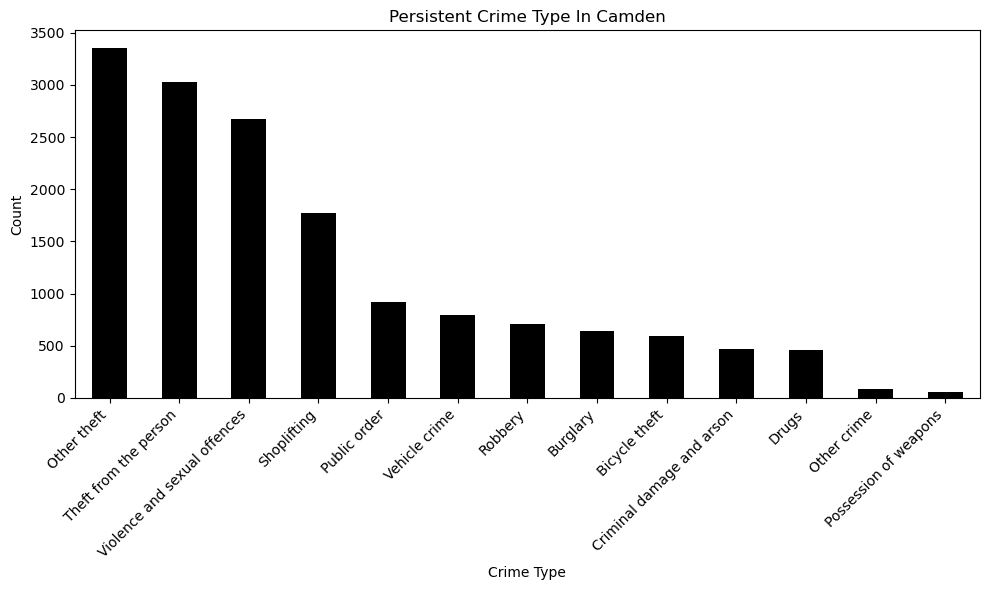

In [23]:
# Step 1: Read the CSV file and ensure the 'Month' column is in datetime format
file_path = 'All_boroughs/Camden.csv'
crime_data = pd.read_csv(file_path)
crime_data['Month'] = pd.to_datetime(crime_data['Month'])

# Step 2: Group by Month and Location, then count the occurrences
crime_counts = crime_data.groupby([crime_data['Month'].dt.to_period('M'), 'Location']).size().reset_index(name='Crime Count')

# Step 3: Assign score based on the condition
crime_counts['Score'] = crime_counts['Crime Count'].apply(lambda x: 1 if x > 1 else 0)

# Step 4: Save the grouped data to a new CSV file
output_file_path_grouped = 'Camden/location_wise_count_with_scores_Camden.csv'
crime_counts.to_csv(output_file_path_grouped, index=False)
print(f"Grouped data with scores saved to {output_file_path_grouped}")

# Step 5: Aggregate the scores by location
if 'Location' in crime_counts.columns and 'Score' in crime_counts.columns:
    aggregated_scores = crime_counts.groupby('Location')['Score'].sum().reset_index()

    # Save the summed scores to a new CSV file
    output_file_path_summed = 'Camden/location_wise_sum_score_Camden.csv'
    aggregated_scores.to_csv(output_file_path_summed, index=False)
    print(f"Summation of scores saved to {output_file_path_summed}")

    # Calculate the mean of the 'Score' column
    mean_score = aggregated_scores['Score'].mean()
    print(mean_score)

    # Round up the mean to the nearest integer
    threshold = math.ceil(mean_score)
    print(threshold)

    # Classify each location as 'persistent' or 'transient'
    aggregated_scores['Classification'] = aggregated_scores['Score'].apply(
        lambda x: 'persistent' if x > threshold else 'transient'
    )

    # Save the results to a new CSV file
    output_file_path_classified = 'Camden/location_wise_sum_score_classification_Camden.csv'
    aggregated_scores.to_csv(output_file_path_classified, index=False)
    print(f"Summation and classification of scores saved to {output_file_path_classified}")

    # Step 6: Filter 'persistent' data and save to a new CSV file
    persistent_data = aggregated_scores[aggregated_scores['Classification'] == 'persistent']
    persistent_output_file_path = 'Camden/persistent_Camden.csv'
    persistent_data.to_csv(persistent_output_file_path, index=False)
    print(f"Persistent data saved to {persistent_output_file_path}")

    # Step 7: Find the maximum score and the corresponding locations
    max_score = persistent_data['Score'].max()
    locations_of_interest = persistent_data[persistent_data['Score'] == max_score]['Location'].tolist()
    print(f"The maximum score is: {max_score}")
    print(f"Location(s) with the maximum score: {locations_of_interest}")

    # Step 8: Read another CSV file for crime types in those locations
    crime_df = pd.read_csv("All_boroughs/Camden.csv")
    filtered_crime_df = crime_df[crime_df['Location'].isin(locations_of_interest)]
    crime_types_for_locations = filtered_crime_df[['Location', 'Crime type']]
    output_path = 'Camden/persistent_crime_type.csv'
    crime_types_for_locations.to_csv(output_path, index=False)
    print(f"Filtered crime data saved to {output_path}")

    # Step 9: Get the most common crime type for each location
    df = pd.read_csv(output_path)
    most_common_crime = df.groupby('Location')['Crime type'].agg(lambda x: x.value_counts().idxmax()).reset_index()
    output_path_common_crime = 'Camden/persistent_crime_type_max.csv'
    most_common_crime.to_csv(output_path_common_crime, index=False)
    print(f"Filtered crime data with most common crime types saved to {output_path_common_crime}")

    # Step 10: Visualize the most common persistent crime types
    crime_data_for_plot = pd.read_csv("Camden/persistent_crime_type.csv")
    crime_counts_for_plot = crime_data_for_plot['Crime type'].value_counts()
    plt.figure(figsize=(10, 6))
    crime_counts_for_plot.plot(kind='bar', color='black')
    plt.title('Persistent Crime Type In Camden')
    plt.xlabel('Crime Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Location' or 'Score' column not found in the data.")


Grouped data with scores saved to Southwark/location_wise_count_with_scores_Southwark.csv
Summation of scores saved to Southwark/location_wise_sum_score_Southwark.csv
11.790525114155251
12
Summation and classification of scores saved to Southwark/location_wise_sum_score_classification_Southwark.csv
Persistent data saved to Southwark/persistent_Southwark.csv
The maximum score is: 40
Location(s) with the maximum score: ['On or near Borough High Street', 'On or near Camberwell Church Street', 'On or near Camberwell Road', 'On or near Elephant Road', 'On or near Horselydown Lane', 'On or near Long Lane', 'On or near New Kent Road', 'On or near Old Kent Road', 'On or near Olmar Street', 'On or near Peckham Road', 'On or near Rye Lane', 'On or near Shopping Area', 'On or near Spa Road', 'On or near Supermarket', 'On or near Upper Ground', 'On or near Walworth Road', 'On or near Wren Road']
Filtered crime data saved to Southwark/persistent_crime_type.csv
Filtered crime data with most common c

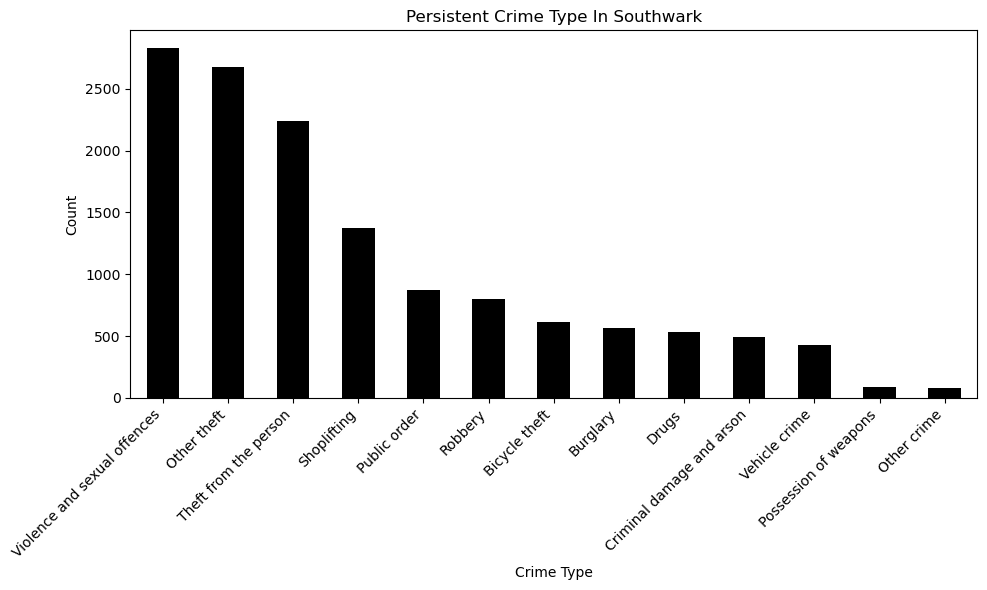

In [24]:
# Step 1: Read the CSV file and ensure the 'Month' column is in datetime format
file_path = 'All_boroughs/Southwark.csv'
crime_data = pd.read_csv(file_path)
crime_data['Month'] = pd.to_datetime(crime_data['Month'])

# Step 2: Group by Month and Location, then count the occurrences
crime_counts = crime_data.groupby([crime_data['Month'].dt.to_period('M'), 'Location']).size().reset_index(name='Crime Count')

# Step 3: Assign score based on the condition
crime_counts['Score'] = crime_counts['Crime Count'].apply(lambda x: 1 if x > 1 else 0)

# Step 4: Save the grouped data to a new CSV file
output_file_path_grouped = 'Southwark/location_wise_count_with_scores_Southwark.csv'
crime_counts.to_csv(output_file_path_grouped, index=False)
print(f"Grouped data with scores saved to {output_file_path_grouped}")

# Step 5: Aggregate the scores by location
if 'Location' in crime_counts.columns and 'Score' in crime_counts.columns:
    aggregated_scores = crime_counts.groupby('Location')['Score'].sum().reset_index()

    # Save the summed scores to a new CSV file
    output_file_path_summed = 'Southwark/location_wise_sum_score_Southwark.csv'
    aggregated_scores.to_csv(output_file_path_summed, index=False)
    print(f"Summation of scores saved to {output_file_path_summed}")

    # Calculate the mean of the 'Score' column
    mean_score = aggregated_scores['Score'].mean()
    print(mean_score)

    # Round up the mean to the nearest integer
    threshold = math.ceil(mean_score)
    print(threshold)

    # Classify each location as 'persistent' or 'transient'
    aggregated_scores['Classification'] = aggregated_scores['Score'].apply(
        lambda x: 'persistent' if x > threshold else 'transient'
    )

    # Save the results to a new CSV file
    output_file_path_classified = 'Southwark/location_wise_sum_score_classification_Southwark.csv'
    aggregated_scores.to_csv(output_file_path_classified, index=False)
    print(f"Summation and classification of scores saved to {output_file_path_classified}")

    # Step 6: Filter 'persistent' data and save to a new CSV file
    persistent_data = aggregated_scores[aggregated_scores['Classification'] == 'persistent']
    persistent_output_file_path = 'Southwark/persistent_Southwark.csv'
    persistent_data.to_csv(persistent_output_file_path, index=False)
    print(f"Persistent data saved to {persistent_output_file_path}")

    # Step 7: Find the maximum score and the corresponding locations
    max_score = persistent_data['Score'].max()
    locations_of_interest = persistent_data[persistent_data['Score'] == max_score]['Location'].tolist()
    print(f"The maximum score is: {max_score}")
    print(f"Location(s) with the maximum score: {locations_of_interest}")

    # Step 8: Read another CSV file for crime types in those locations
    crime_df = pd.read_csv("All_boroughs/Southwark.csv")
    filtered_crime_df = crime_df[crime_df['Location'].isin(locations_of_interest)]
    crime_types_for_locations = filtered_crime_df[['Location', 'Crime type']]
    output_path = 'Southwark/persistent_crime_type.csv'
    crime_types_for_locations.to_csv(output_path, index=False)
    print(f"Filtered crime data saved to {output_path}")

    # Step 9: Get the most common crime type for each location
    df = pd.read_csv(output_path)
    most_common_crime = df.groupby('Location')['Crime type'].agg(lambda x: x.value_counts().idxmax()).reset_index()
    output_path_common_crime = 'Southwark/persistent_crime_type_max.csv'
    most_common_crime.to_csv(output_path_common_crime, index=False)
    print(f"Filtered crime data with most common crime types saved to {output_path_common_crime}")

    # Step 10: Visualize the most common persistent crime types
    crime_data_for_plot = pd.read_csv("Southwark/persistent_crime_type.csv")
    crime_counts_for_plot = crime_data_for_plot['Crime type'].value_counts()
    plt.figure(figsize=(10, 6))
    crime_counts_for_plot.plot(kind='bar', color='black')
    plt.title('Persistent Crime Type In Southwark')
    plt.xlabel('Crime Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Location' or 'Score' column not found in the data.")


Grouped data with scores saved to Lambeth/location_wise_count_with_scores_Lambeth.csv
Summation of scores saved to Lambeth/location_wise_sum_score_Lambeth.csv
11.977075588599751
12
Summation and classification of scores saved to Lambeth/location_wise_sum_score_classification_Lambeth.csv
Persistent data saved to Lambeth/persistent_Lambeth.csv
The maximum score is: 40
Location(s) with the maximum score: ['On or near Addington Street', 'On or near Brixton Hill', 'On or near Chicheley Street', 'On or near Clapham Common South Side', 'On or near Further/Higher Educational Building', 'On or near Hospital', 'On or near Levehurst Way', 'On or near Nightclub', 'On or near Pear Place', 'On or near Streatham Hill', 'On or near Waterloo Road']
Filtered crime data saved to Lambeth/persistent_crime_type.csv
Filtered crime data with most common crime types saved to Lambeth/persistent_crime_type_max.csv


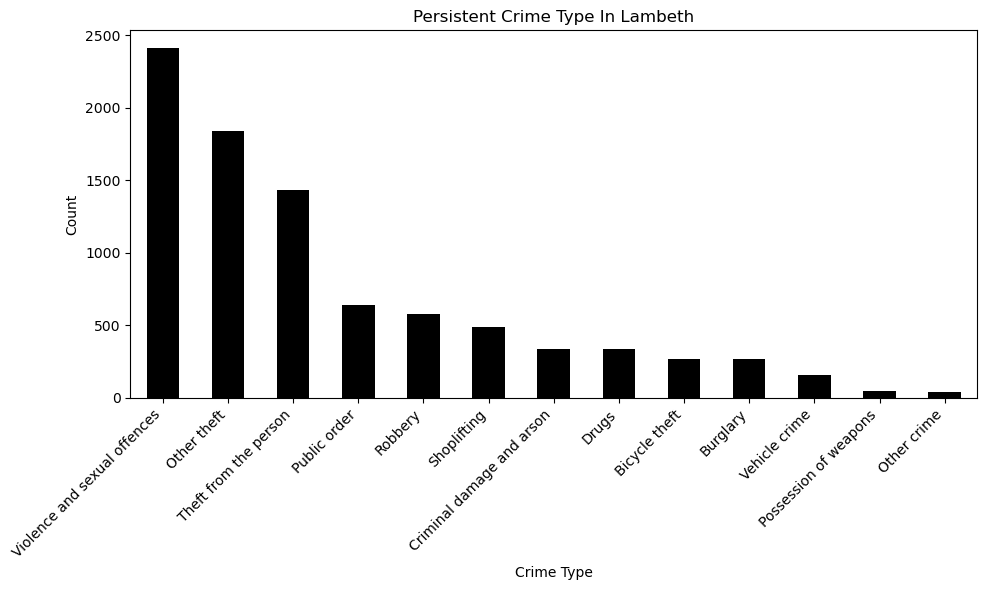

In [25]:
# Step 1: Read the CSV file and ensure the 'Month' column is in datetime format
file_path = 'All_boroughs/Lambeth.csv'
crime_data = pd.read_csv(file_path)
crime_data['Month'] = pd.to_datetime(crime_data['Month'])

# Step 2: Group by Month and Location, then count the occurrences
crime_counts = crime_data.groupby([crime_data['Month'].dt.to_period('M'), 'Location']).size().reset_index(name='Crime Count')

# Step 3: Assign score based on the condition
crime_counts['Score'] = crime_counts['Crime Count'].apply(lambda x: 1 if x > 1 else 0)

# Step 4: Save the grouped data to a new CSV file
output_file_path_grouped = 'Lambeth/location_wise_count_with_scores_Lambeth.csv'
crime_counts.to_csv(output_file_path_grouped, index=False)
print(f"Grouped data with scores saved to {output_file_path_grouped}")

# Step 5: Aggregate the scores by location
if 'Location' in crime_counts.columns and 'Score' in crime_counts.columns:
    aggregated_scores = crime_counts.groupby('Location')['Score'].sum().reset_index()

    # Save the summed scores to a new CSV file
    output_file_path_summed = 'Lambeth/location_wise_sum_score_Lambeth.csv'
    aggregated_scores.to_csv(output_file_path_summed, index=False)
    print(f"Summation of scores saved to {output_file_path_summed}")

    # Calculate the mean of the 'Score' column
    mean_score = aggregated_scores['Score'].mean()
    print(mean_score)

    # Round up the mean to the nearest integer
    threshold = math.ceil(mean_score)
    print(threshold)

    # Classify each location as 'persistent' or 'transient'
    aggregated_scores['Classification'] = aggregated_scores['Score'].apply(
        lambda x: 'persistent' if x > threshold else 'transient'
    )

    # Save the results to a new CSV file
    output_file_path_classified = 'Lambeth/location_wise_sum_score_classification_Lambeth.csv'
    aggregated_scores.to_csv(output_file_path_classified, index=False)
    print(f"Summation and classification of scores saved to {output_file_path_classified}")

    # Step 6: Filter 'persistent' data and save to a new CSV file
    persistent_data = aggregated_scores[aggregated_scores['Classification'] == 'persistent']
    persistent_output_file_path = 'Lambeth/persistent_Lambeth.csv'
    persistent_data.to_csv(persistent_output_file_path, index=False)
    print(f"Persistent data saved to {persistent_output_file_path}")

    # Step 7: Find the maximum score and the corresponding locations
    max_score = persistent_data['Score'].max()
    locations_of_interest = persistent_data[persistent_data['Score'] == max_score]['Location'].tolist()
    print(f"The maximum score is: {max_score}")
    print(f"Location(s) with the maximum score: {locations_of_interest}")

    # Step 8: Read another CSV file for crime types in those locations
    crime_df = pd.read_csv("All_boroughs/Lambeth.csv")
    filtered_crime_df = crime_df[crime_df['Location'].isin(locations_of_interest)]
    crime_types_for_locations = filtered_crime_df[['Location', 'Crime type']]
    output_path = 'Lambeth/persistent_crime_type.csv'
    crime_types_for_locations.to_csv(output_path, index=False)
    print(f"Filtered crime data saved to {output_path}")

    # Step 9: Get the most common crime type for each location
    df = pd.read_csv(output_path)
    most_common_crime = df.groupby('Location')['Crime type'].agg(lambda x: x.value_counts().idxmax()).reset_index()
    output_path_common_crime = 'Lambeth/persistent_crime_type_max.csv'
    most_common_crime.to_csv(output_path_common_crime, index=False)
    print(f"Filtered crime data with most common crime types saved to {output_path_common_crime}")

    # Step 10: Visualize the most common persistent crime types
    crime_data_for_plot = pd.read_csv("Lambeth/persistent_crime_type.csv")
    crime_counts_for_plot = crime_data_for_plot['Crime type'].value_counts()
    plt.figure(figsize=(10, 6))
    crime_counts_for_plot.plot(kind='bar', color='black')
    plt.title('Persistent Crime Type In Lambeth')
    plt.xlabel('Crime Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Location' or 'Score' column not found in the data.")


## Crime Type Forecasting


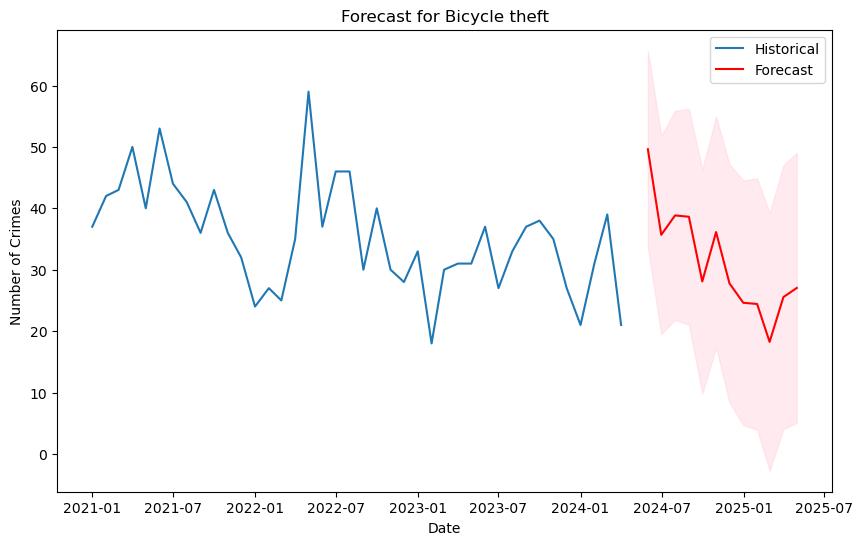

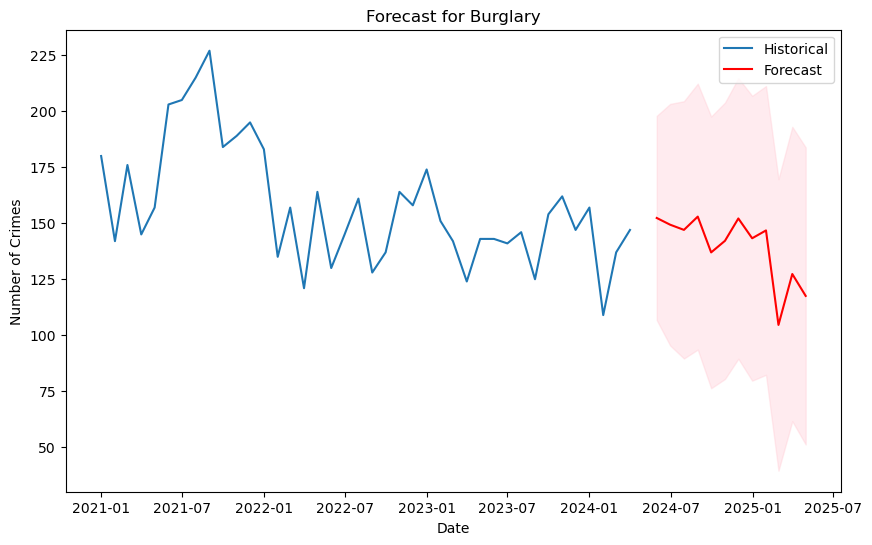

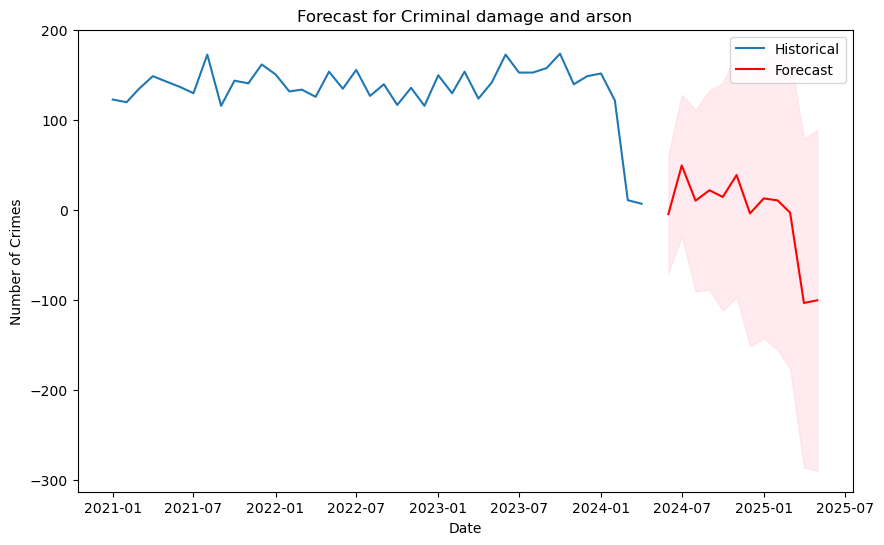

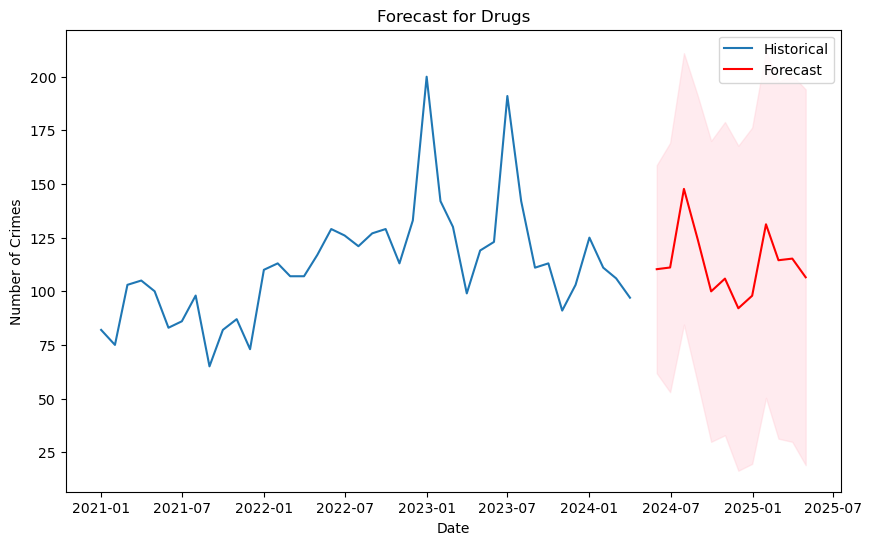

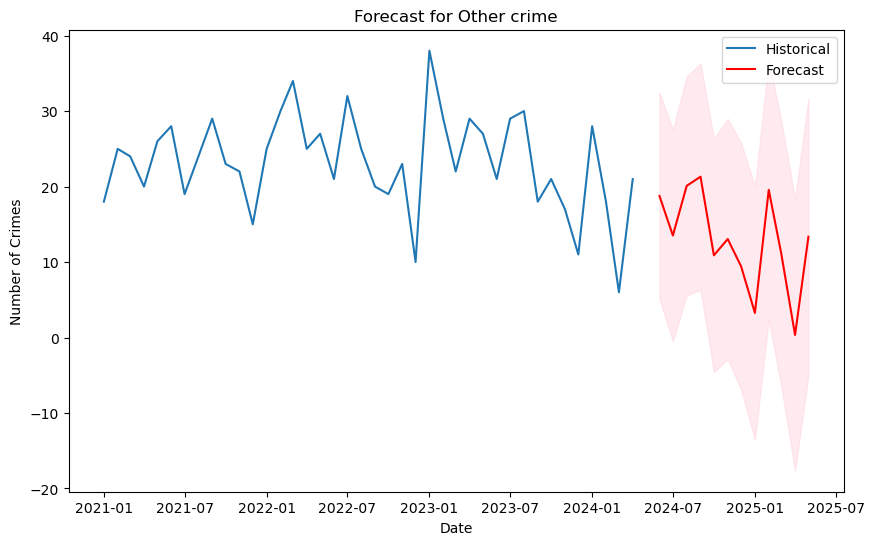

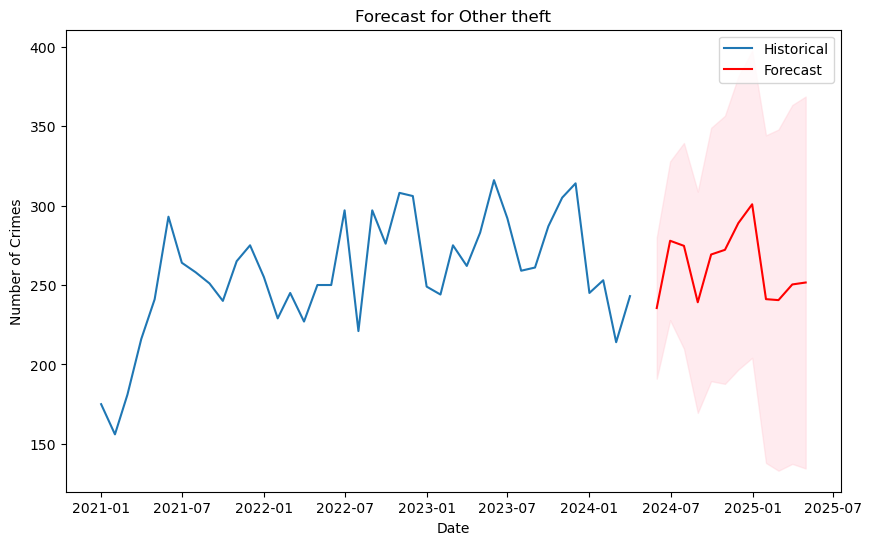

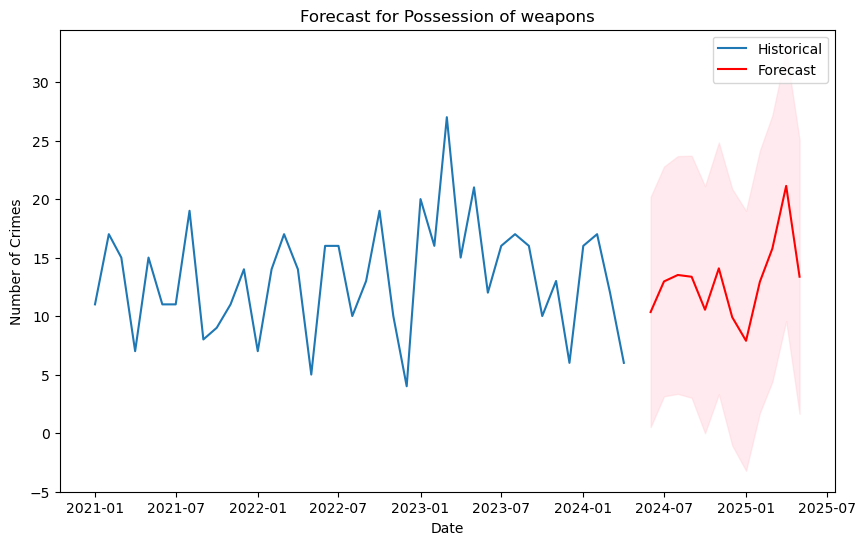

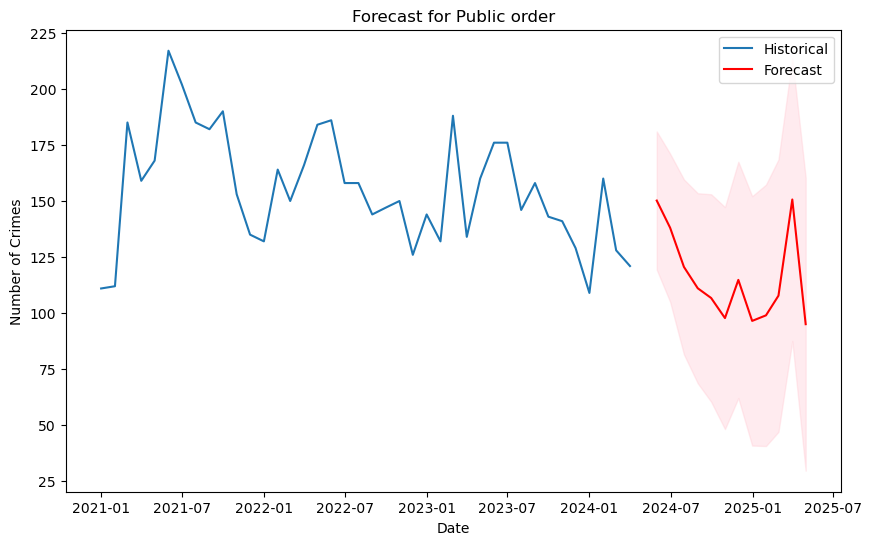

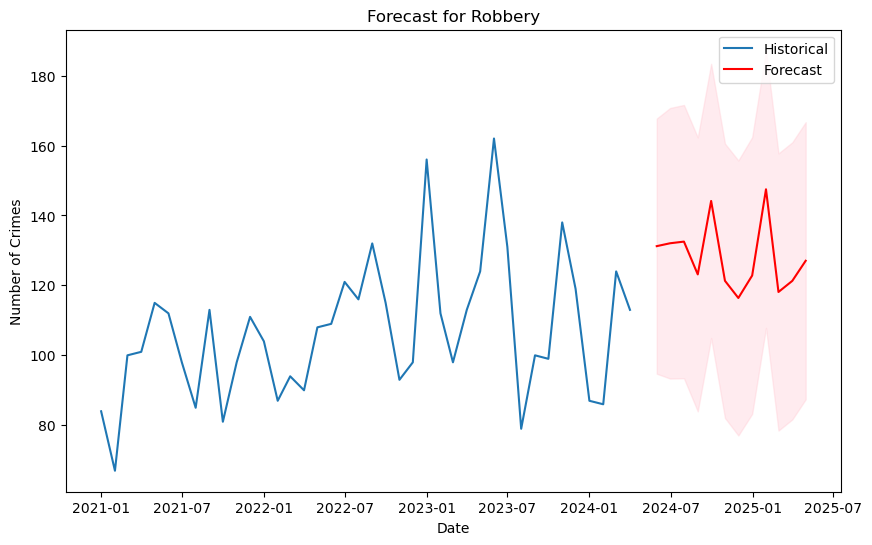

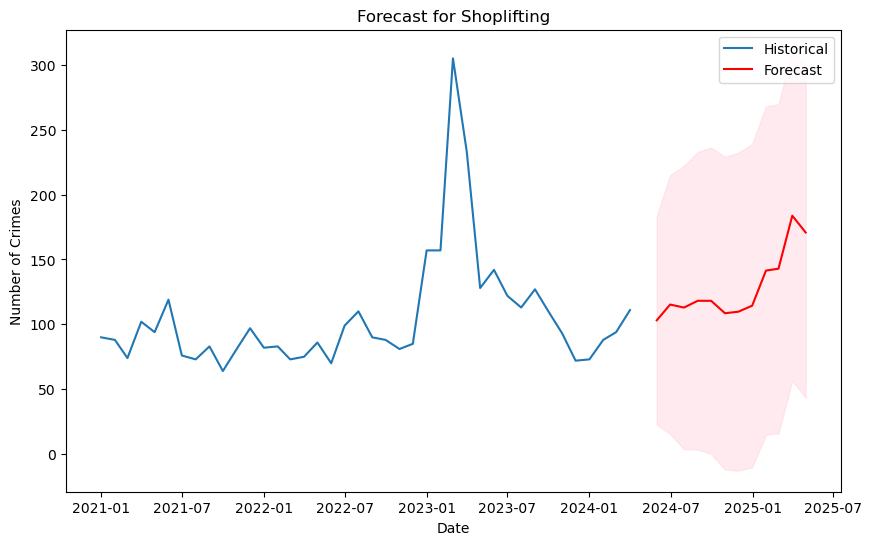

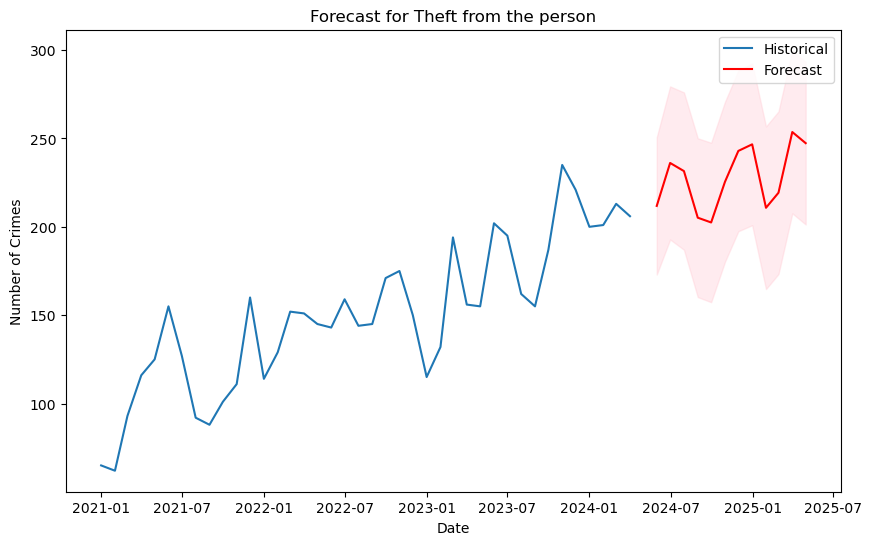

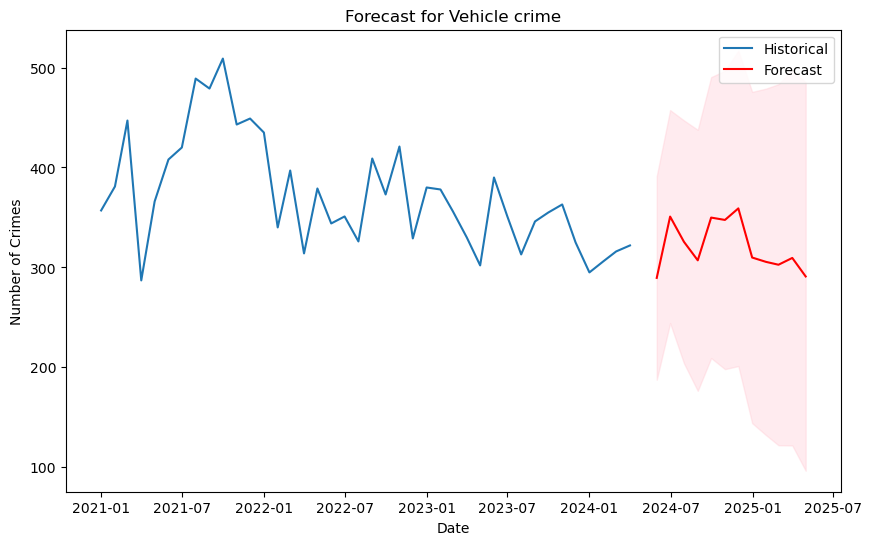

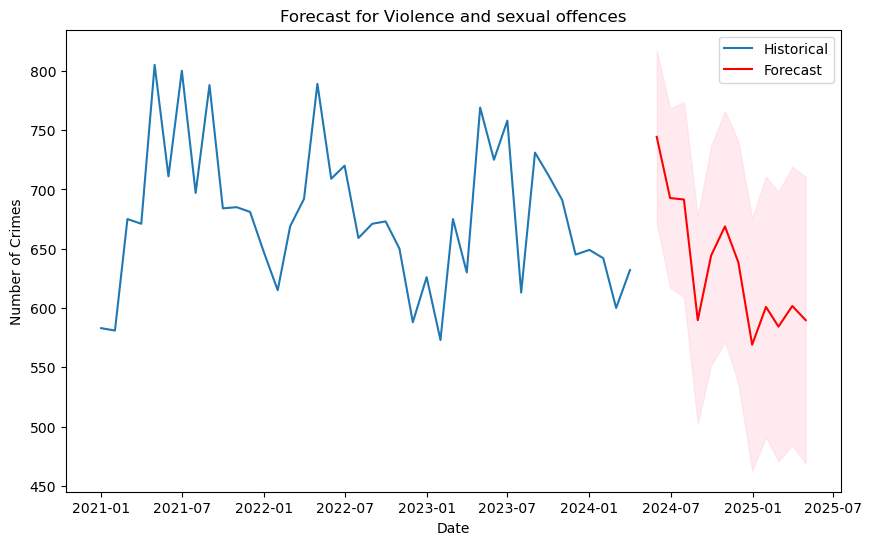

In [26]:
warnings.filterwarnings("ignore")

# Load the CSV file
file_path = 'Haringey/haringey_crimes_combined.csv' 
data = pd.read_csv(file_path)

# Convert 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Aggregate the data by month and crime type
crime_trends = data.groupby(['Month', 'Crime type']).size().unstack(fill_value=0)

# Function to fit ARIMA model and forecast future trends
def forecast_crime_trend(crime_type, crime_data, periods=12):
    # Prepare the data
    y = crime_data[crime_type]
    
    # Fit the ARIMA model
    model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    
    # Forecast future values
    forecast = model_fit.get_forecast(steps=periods)
    forecast_index = pd.date_range(start=y.index[-1], periods=periods+1, freq='M')[1:]
    forecast_values = forecast.predicted_mean
    conf_int = forecast.conf_int()
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(y.index, y, label='Historical')
    plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
    plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'Forecast for {crime_type}')
    plt.xlabel('Date')
    plt.ylabel('Number of Crimes')
    plt.legend()
    plt.show()

# Forecast and plot trends for each crime type
for crime_type in crime_trends.columns:
    forecast_crime_trend(crime_type, crime_trends)

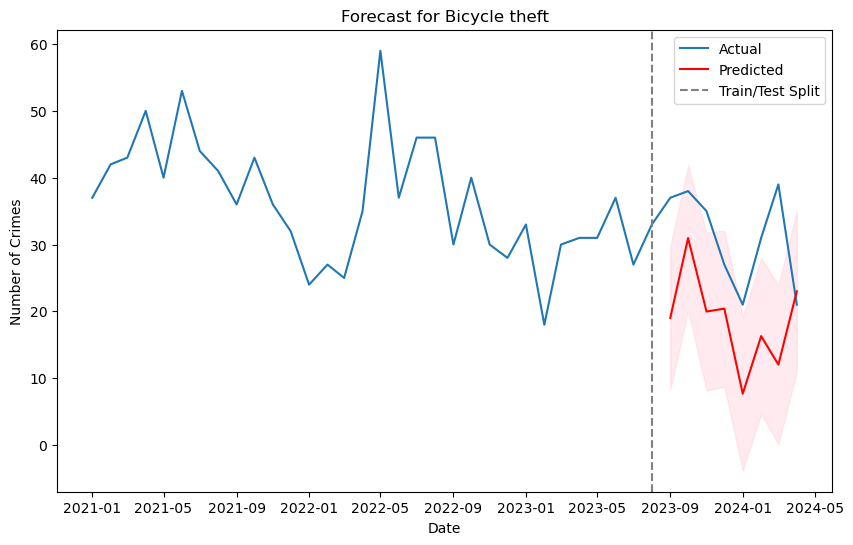

Bicycle theft - MAE: 12.95, MSE: 220.82, MAPE: 40.49%


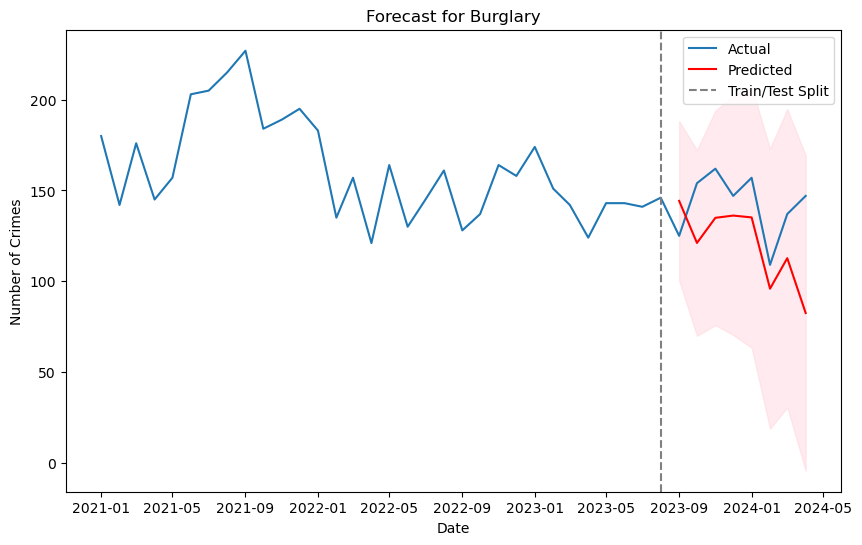

Burglary - MAE: 26.74, MSE: 963.95, MAPE: 18.56%


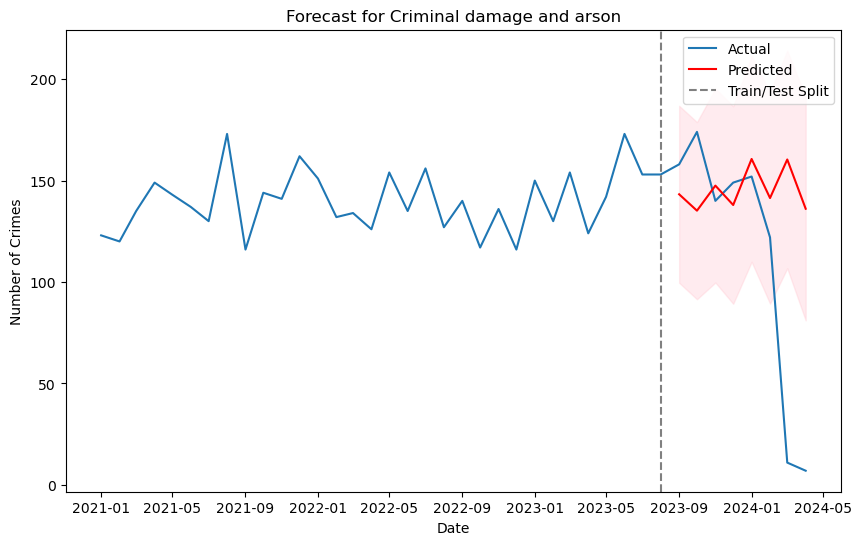

Criminal damage and arson - MAE: 47.34, MSE: 5168.29, MAPE: 408.60%


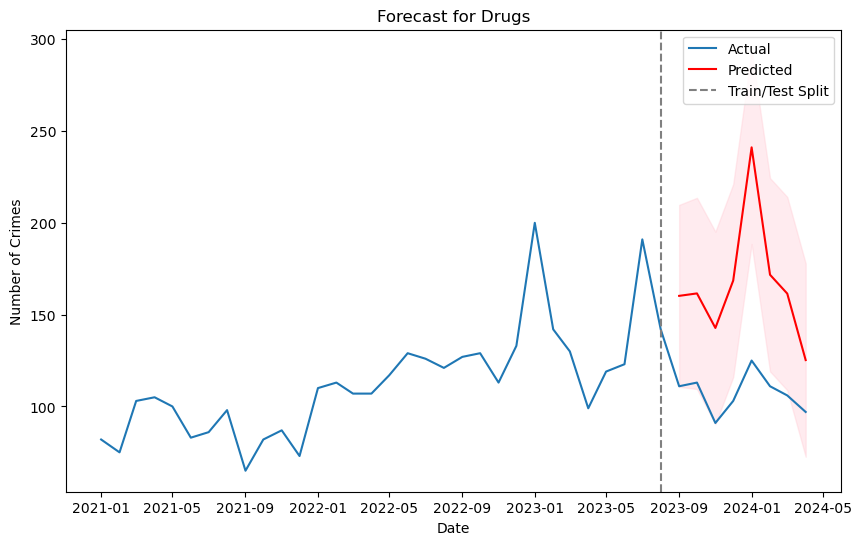

Drugs - MAE: 59.46, MSE: 4099.97, MAPE: 54.61%


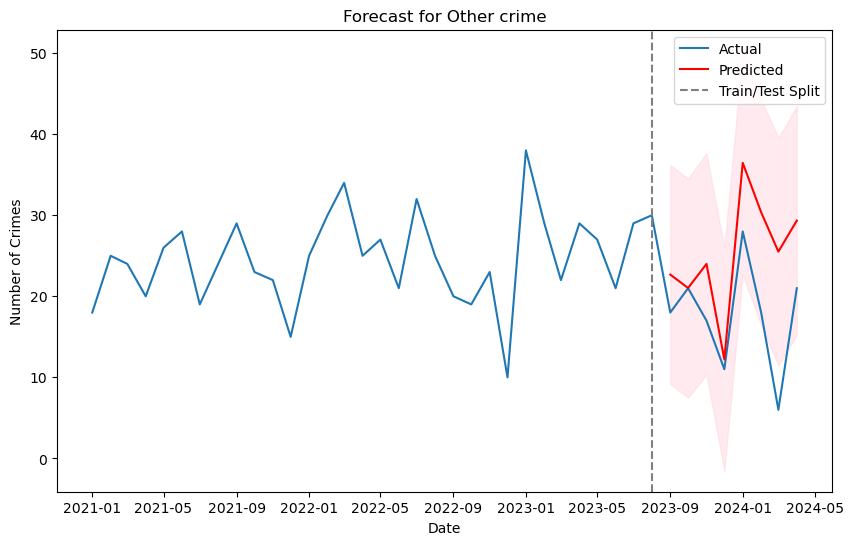

Other crime - MAE: 7.70, MSE: 93.40, MAPE: 67.77%


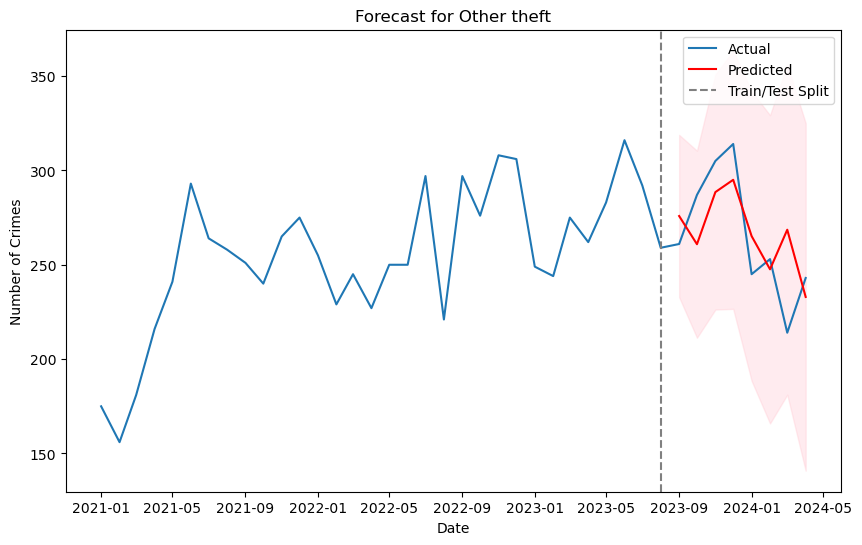

Other theft - MAE: 20.83, MSE: 631.19, MAPE: 8.28%


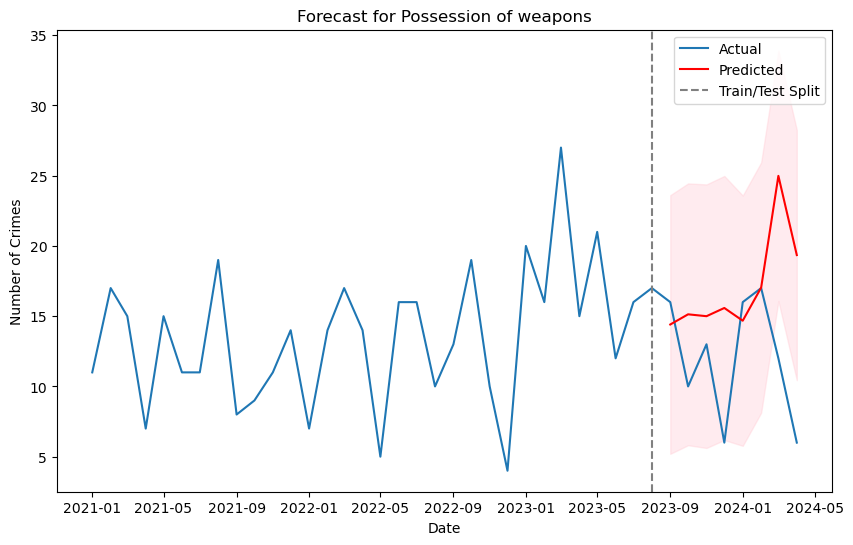

Possession of weapons - MAE: 5.75, MSE: 59.17, MAPE: 71.95%


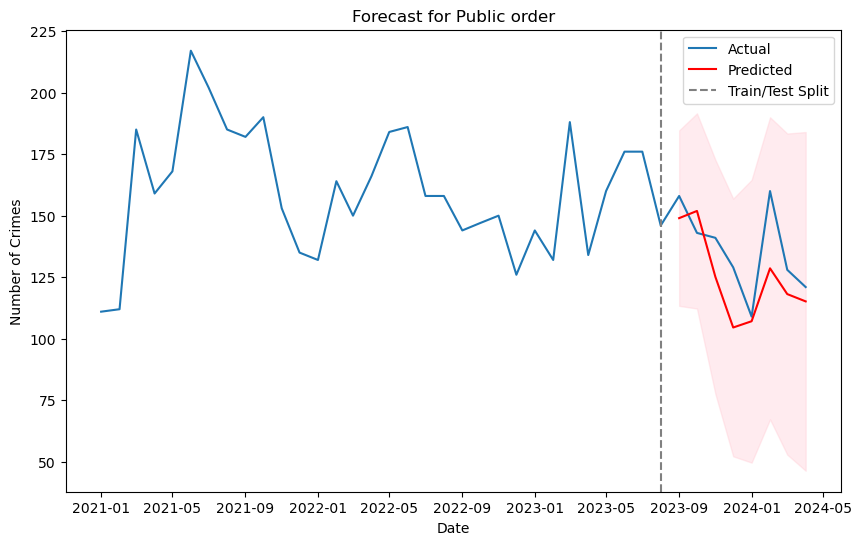

Public order - MAE: 13.39, MSE: 266.10, MAPE: 9.50%


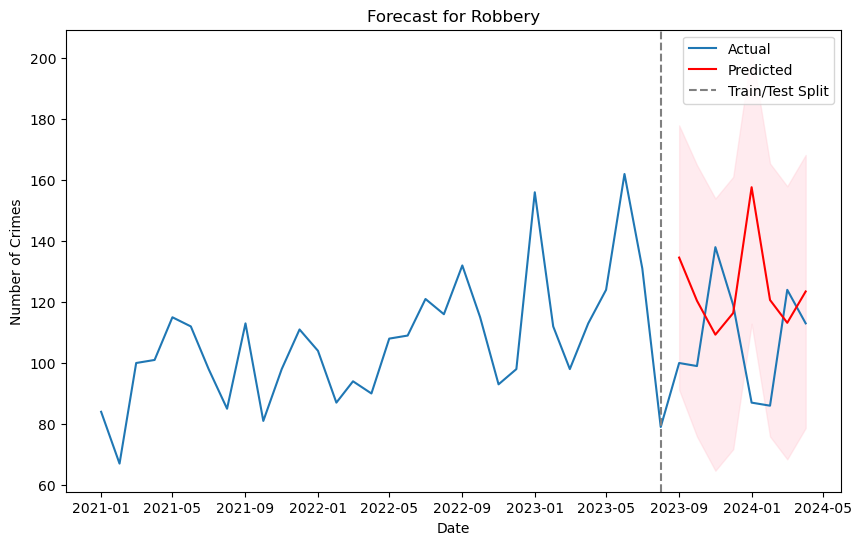

Robbery - MAE: 26.74, MSE: 1113.15, MAPE: 27.34%


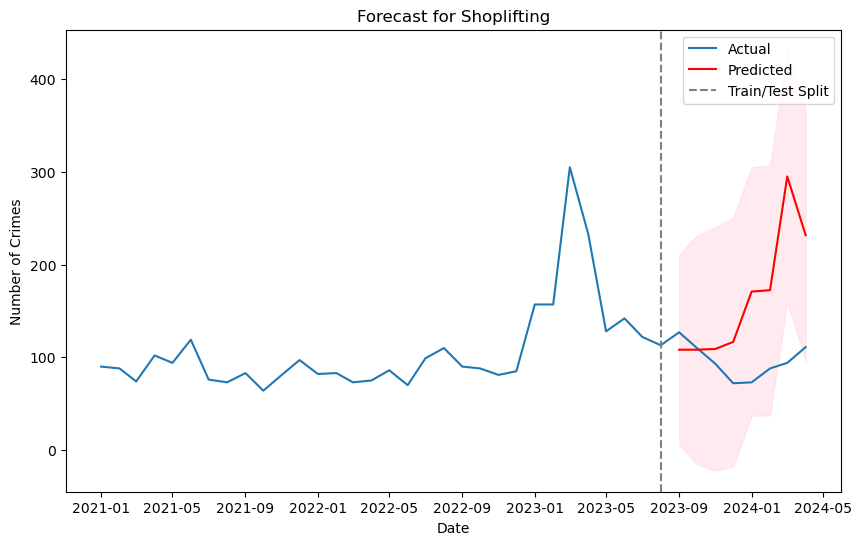

Shoplifting - MAE: 73.17, MSE: 9292.21, MAPE: 81.04%


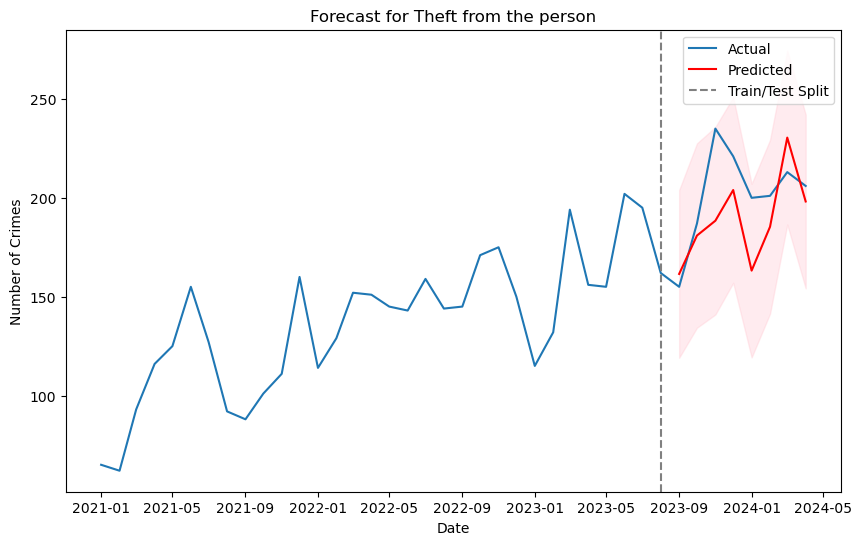

Theft from the person - MAE: 19.25, MSE: 563.15, MAPE: 9.15%


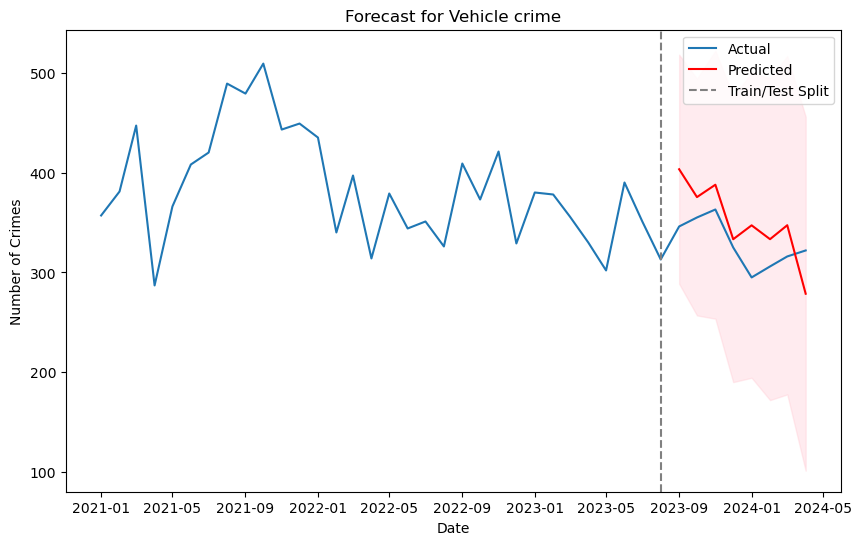

Vehicle crime - MAE: 33.09, MSE: 1336.90, MAPE: 10.20%


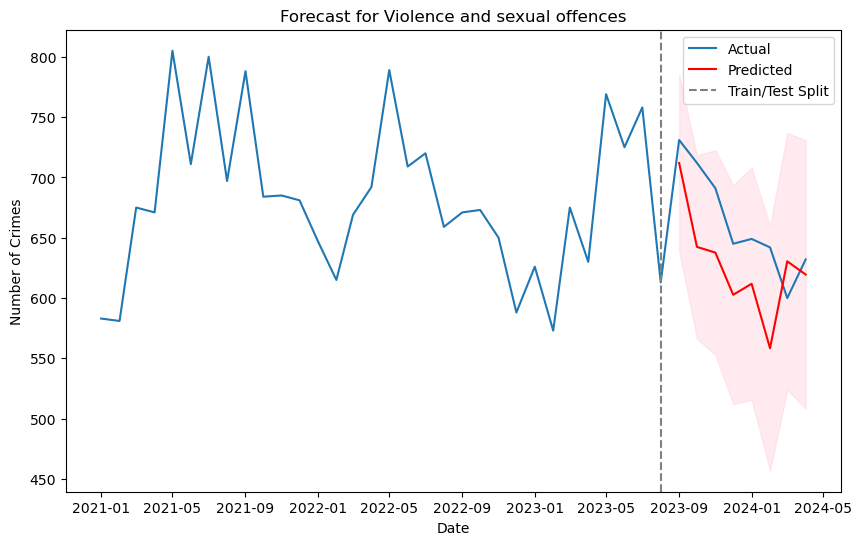

Violence and sexual offences - MAE: 43.51, MSE: 2412.87, MAPE: 6.56%


In [27]:
# Load the CSV file
file_path = 'Haringey/haringey_crimes_combined.csv'
data = pd.read_csv(file_path)

# Convert 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Aggregate the data by month and crime type
crime_trends = data.groupby(['Month', 'Crime type']).size().unstack(fill_value=0)

# Function to fit ARIMA model, forecast future trends, and plot results
def forecast_crime_trend(crime_type, crime_data, train_size=0.8):
    # Prepare the data
    y = crime_data[crime_type]
    
    # Split the data into training and testing sets
    train_size = int(len(y) * train_size)
    train, test = y.iloc[:train_size], y.iloc[train_size:]
    
    # Fit the ARIMA model on the training set
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    
    # Forecast for the testing period
    forecast = model_fit.get_forecast(steps=len(test))
    forecast_values = forecast.predicted_mean
    conf_int = forecast.conf_int()
    
    # Calculate accuracy metrics
    mae = mean_absolute_error(test, forecast_values)
    mse = mean_squared_error(test, forecast_values)
    mape = np.mean(np.abs((test - forecast_values) / test)) * 100
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(y.index, y, label='Actual')
    plt.plot(test.index, forecast_values, label='Predicted', color='red')
    plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Train/Test Split')
    plt.title(f'Forecast for {crime_type}')
    plt.xlabel('Date')
    plt.ylabel('Number of Crimes')
    plt.legend()
    plt.show()
    
    print(f'{crime_type} - MAE: {mae:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%')

# Forecast and plot trends for each crime type
for crime_type in crime_trends.columns:
    forecast_crime_trend(crime_type, crime_trends)
